In [1]:
import matplotlib.pyplot as plt
import numpy as np

In [2]:
import copy
from sklearn.decomposition import PCA

In [3]:
import networkx as nx

In [4]:
episode = np.zeros([1,5,28,28,2])
episode[0][0][:,:,0] = np.loadtxt("episode_0.csv")
episode[0][0][:,:,1] = np.loadtxt("episode_0.csv")

episode[0][1][:,:,0] = np.loadtxt("episode_1.csv")
episode[0][1][:,:,1] = np.loadtxt("episode_1.csv")

episode[0][2][:,:,0] = np.loadtxt("episode_2.csv")
episode[0][2][:,:,1] = np.loadtxt("episode_2.csv")

episode[0][3][:,:,0] = np.loadtxt("episode_3.csv")
episode[0][3][:,:,1] = np.loadtxt("episode_3.csv")

episode[0][4][:,:,0] = np.loadtxt("episode_4.csv")
episode[0][4][:,:,1] = np.loadtxt("episode_4.csv")


In [1666]:
class sentive_sequence_nrn(object):
    """neurone Sequence du modèle de réseau de neurones dynamiques Sentive AI

    Args:
        object (int): numéro donné à l'identifiant du neurone
    """
    def __init__(self, number):
        self.number = number
        self.neuron = {
            "_id":number,
            "schema_version":1,
            "type": "sentive_vision_packed_ratio",
            "layer_id":0,
            "ratio_conn":0, # rapport entre le nombre de connexion de ce neurone et le nb de connexions de ses plus proches voisins
            "DbConnectivity":{
                "pre_synaptique":[],
                "post_synaptique":[],
                "weights":{}
            },
            "meta":{
                "path" : [],
                "tips" : [],
                "nodes" : [],
                "total_length" : 0,
            }
        }


In [ ]:
class sentive_segment_nrn(object):
    """neurone SEGMENT du modèle de réseau de neurones dynamiques Sentive AI

    Args:
        object (int): numéro donné à l'identifiant du neurone
    """
    def __init__(self, number):
        self.number = number
        self.neuron = {
            "_id":number,
            "schema_version":1,
            "type": "sentive_vision_packed_ratio",
            "layer_id":0,
            "ratio_conn":0, # rapport entre le nombre de connexion de ce neurone et le nb de connexions de ses plus proches voisins
            "DbConnectivity":{
                "pre_synaptique":[],
                "post_synaptique":[],
                "weights":{}
            },
            "meta":{
                "path" : [],
                "tips" : [],
                "nodes" : [],
                "total_length" : 0,
            }
        }


In [1925]:
class sentive_vision_neuron(object):
    """
        prototype de données des objets neurones vision segment arcs
        Cette classe ne contient aucune fonction mais ne sert qu'à conserver les données
        Les fonctions sont dans une autre classe.
    """
    def __init__(self, number):
        self.number = number
        self.neuron = {
            "_id":number,
            "schema_version":2,
            "type": "sentive_vision_arcs",
            "layer_id":0,
            "ratio_conn":0,
            "DbConnectivity":{
                "pre_synaptique":[],
                "post_synaptique":[],
                "weights":{}
            },
            "meta":{
                "center":{
                    "x":0,
                    "y":0
                },
                "real_center":{
                    "x":0.0,
                    "y":0.0
                },
                "matrix_width":1,
                "local_tip_1":{
                    "x":0,
                    "y":0
                },
                "vector_1":{
                    "x":0,
                    "y":0
                },
                "local_tip_2":{
                    "x":0,
                    "y":0
                },
                "vector_2":{
                    "x":0,
                    "y":0
                },
                "angle":-999,
                "derive_angle":0
            }
        }

    
class sentive_neuron_helper():
    def __init__(self):
        
        self.init_matrix = []
        self.init_matrix.append( np.array([[1, 0, -1],[1, 0, -1],[1, 0, -1]]))
        self.init_matrix.append( np.array([[1, 1, 1],[0, 0, 0],[-1, -1, -1]]))
        self.init_matrix.append( np.array([[1, 1, 0],[1, 0, -1],[0, -1, -1]]))
        self.init_matrix.append( np.array([[0, -1, -1],[1, 0, -1],[1, 1, 0]]))


        self.dir_matrix =  np.array([[1, 1, 1],[1, 0, 1],[1, 1, 1]])


        self.ok_conf = []
        self.ok_conf.append( np.array([[1, 0, -1],[0, 1, 0],[0, 0, 0]]))
        self.ok_conf.append( np.array([[1, 0, 0],[0, 1, -1],[0, 0, 0]]))
        self.ok_conf.append( np.array([[1, 0, 0],[0, 1, 0],[0, 0, -1]]))
        
        self.ok_conf.append( np.array([[0, 0, -1],[1, 1, 0],[0, 0, 0]]))
        self.ok_conf.append( np.array([[0, 0, 0],[1, 1, -1],[0, 0, 0]]))
        self.ok_conf.append( np.array([[0, 0, 0],[1, 1, 0],[0, 0, -1]]))
        
        self.ok_conf.append( np.array([[0, 0, -1],[0, 1, 0],[1, 0, 0]]))
        self.ok_conf.append( np.array([[0, 0, 0],[0, 1, -1],[1, 0, 0]]))
        self.ok_conf.append( np.array([[0, 0, 0],[0, 1, 0],[1, 0, -1]]))
        
        self.ok_conf.append( np.array([[0, 0, 1],[0, 1, 0],[0, 0, -1]]))
        self.ok_conf.append( np.array([[0, 1, 0],[0, 1, 0],[0, 0, -1]]))
        
        self.ok_conf.append( np.array([[1, 0, 0],[0, 1, 0],[0, -1, 0]]))
        self.ok_conf.append( np.array([[0, 1, 0],[0, 1, 0],[0, -1, 0]]))
        
        self.ok_conf.append( np.array([[1, 0, 0],[0, 1, 0],[-1, 0, 0]]))
        self.ok_conf.append( np.array([[0, 1, 0],[0, 1, 0],[-1, 0, 0]]))
        
        self.lst_nrns = []
        self.id_nrn = 0 # id max des neurones
        self.nb_nrns = 0 # nb de neurones dans le tableau (sans avoir à utiliser la fonction len)
        
        # https://networkx.org/documentation/stable/tutorial.html
        self.netGraph = nx.Graph()

        self.layer_nb = 0
        self.layer_graph = []

        self.nb_2_1st_layers = 0


    def new_layer(self):
        self.layer_nb +=1
        self.layer_graph.append(nx.DiGraph())

    
    def add_edge(self, nrn1_id, nrn2_id):
        self.netGraph.add_edge(nrn1_id, nrn2_id)
        if self.layer_nb>0:
            self.layer_graph[self.layer_nb-1].add_edge(nrn1_id, nrn2_id)


    def increment_weight(self, nrn, nrn_post_synaptic_id):
        try:
            nrn["DbConnectivity"]["weights"][nrn_post_synaptic_id] += 1
        except KeyError:
            nrn["DbConnectivity"]["weights"][nrn_post_synaptic_id] = 1

        
    def add_new_nrn(self, nrn_type=''):
        """Ajoute un nouveau neurone au pool (remplace la base de données MongoDB de Sentive AI en mode non cloud)

        Returns:
            [int]: [identifiant du nouveau neurone créé]
        """
        self.id_nrn += 1
        if nrn_type=='':
            self.lst_nrns.append(sentive_vision_neuron(self.id_nrn))
        else:
            self.lst_nrns.append(sentive_sequence_nrn(self.id_nrn))
        
        self.netGraph.add_node(self.id_nrn)

        if self.layer_nb>0:
            self.layer_graph[self.layer_nb-1].add_node(self.id_nrn)

        self.nb_nrns = len(self.lst_nrns)
        self.lst_nrns[self.nb_nrns-1].neuron["layer_id"] = self.layer_nb

        return self.nb_nrns - 1
        
        
    def FctIterMean(self, Nb_activations, NewAct, avgValue):
        """Calcule la Moyenne itérative

        Args:
            Nb_activations ([int]): [nb de valeur intégrée dans la moyenne précédente]
            NewAct ([float]): [Nouvelle valeur à intégrer à la moyenne]
            avgValue ([float]): [valeur moyenne précédemment calculée]

        Returns:
            [float]: [nouvelle moyenne]
        """
        Nb_activations = int(Nb_activations)
        NewAct = float(NewAct)
        avgValue = float(avgValue)
        return ((Nb_activations - 1) / Nb_activations
                * avgValue + NewAct / Nb_activations)
    
    
    def get_x_matrix(self, size):
        size = int(size)
        if size>=2:
            output = np.array([np.arange(size),np.arange(size)])
        else:
            return np.array(np.arange(size))
        for i in range(2,size):
            output = np.append(output,[np.arange(size)],axis=0)
        return output

    
    def get_y_matrix(self, size):
        size = int(size)
        if size>=2:
            output = np.array([np.ones(size)*0,np.ones(size)*1])
        else:
            return np.array(np.arange(size))
        for i in range(2,size):
            output = np.append(output,[np.ones(size)*i],axis=0)
        return output
    
    
    def get_matrix_center(self, size):
        """Retourne les coordonnées du centre de la matrice de taille "size"

        Args:
            size ([int]): [de prédérence une matrice carré de taille impaire]

        Returns:
            [int]: [coordonnées x et y du centre de la matrice carré impaire]
        """
        return np.floor(size/2)
    
    
    def get_receptive_field(self, local_neuron, current_vision):
        """
            
        """
        min_val_y = int(local_neuron["meta"]["center"]["y"] - np.floor(
                                                local_neuron["meta"]["matrix_width"]/2))
        max_val_y = int(local_neuron["meta"]["center"]["y"] + np.ceil(
                                                local_neuron["meta"]["matrix_width"]/2))
        min_val_x = int(local_neuron["meta"]["center"]["x"] - np.floor(
                                                local_neuron["meta"]["matrix_width"]/2))
        max_val_x = int(local_neuron["meta"]["center"]["x"] + np.ceil(
                                                local_neuron["meta"]["matrix_width"]/2))
        return current_vision[min_val_y:max_val_y, min_val_x:max_val_x, 0]
    

    def get_all_center_fields(self, list_neurons, current_vision):
        """
            Retourne l'image avec les centres des neurones surlignés
            Pour l'ensemble des neurones
        """
        nb = 0
        for sent_neuron in list_neurons:
            neuron = sent_neuron.neuron["meta"]
            current_vision[neuron["center"]["y"],neuron["center"]["x"]] = 5 #* current_vision[neuron["center"]["y"],neuron["center"]["x"]]
            nb += 1
        print(nb,"neurons")
        return current_vision
    
    
    def get_all_center_fields_width(self, list_neurons, current_vision, lint_width=5):
        """
            Retourne l'image avec les centres des neurones surlignés
            Il faut spécifier la couche des neurones sélectionnés
        """
        nb = 0
        for sent_neuron in list_neurons:
            neuron = sent_neuron.neuron["meta"]
            if neuron["matrix_width"] == lint_width:
                current_vision[neuron["center"]["y"],neuron["center"]["x"]] = 5 #* current_vision[neuron["center"]["y"],neuron["center"]["x"]]
                nb += 1
        print(nb,"neurons")
        return current_vision

    
    def get_neuron_receptive_field(self, nrn_id, current_vision, neurons_pool=-1, verbose=False):
        """Retourne le champs récepteur du neurone sur la matrice current_vision.

        Args:
            current_vision ([type]): [description]
            nrn_id ([type]): [description]
            neurons_pool (int, optional): [description]. Defaults to -1.
            verbose (bool, optional): [description]. Defaults to False.

        Returns:
            [matrice]: [matrice contenant la position du champs récepteur du neurone nrn_id]
        """

        if neurons_pool==-1:
            neurons_pool = self.lst_nrns
            
        # récupère le neurone visé
        crnt_nrn = self.get_neuron_from_id(nrn_id, neurons_pool)
        # récupère la liste des 
        try:
            lst_nrn = crnt_nrn["meta"]["field_list"]
        except KeyError:
            lst_nrn = crnt_nrn["DbConnectivity"]["pre_synaptique"]
        
        # récupère le neurone pour chaque id de la liste
        nb = 0
        for sensor_id in lst_nrn:
            neuron = self.get_neuron_from_id(sensor_id, neurons_pool)
            current_vision[neuron["meta"]["center"]["y"],neuron["meta"]["center"]["x"]] = 5
            nb +=1
        if verbose:
            print(nb, "pixels")
            print(crnt_nrn)
        return current_vision
    
    
    def update_coord(self, previous):
        """
            lorsqu'on augmente la taille de la matrice de +2
            Toutes les coordonnées relatives à la taille précédente doivent être modifiées grace 
            à cette fonction.
        """
        previous["x"] += 1
        previous["y"] += 1
        return previous
    
    
    def rotate_vector(self, vector, angle_rotation):
        """Retourne les coordonnées du vector après rotation
        TODO: cette fonction n'est semble t'il jamais appelée

        Args:
            vector ([struct]): [structure contenant les coordonnées (x,y) d'un vecteur]
            angle_rotation ([float]): [exprimé en radian]

        Returns:
            [type]: [description]
        """
        output_vector = {
            "x":0,
            "y":0
        }
        output_vector["x"] = np.around(vector["x"] * np.cos(angle_rotation) - vector["y"] * np.sin(angle_rotation))
        output_vector["y"] = np.around(vector["x"] * np.sin(angle_rotation) + vector["y"] * np.cos(angle_rotation))
        return output_vector
    
    
    def anti_rotate_vector(self, vector, angle_rotation):
        output_vector = {
            "x":0,
            "y":0
        }
        output_vector["x"] = np.around(vector["x"] * np.cos(angle_rotation) + vector["y"] * np.sin(angle_rotation))
        output_vector["y"] = np.around(vector["y"] * np.cos(angle_rotation) - vector["x"] * np.sin(angle_rotation))
        return output_vector
    
    
    def get_pos_from_id(self, neuron_idx2, neurons_pool=-1):
        """
            retourne la position dans la tableau à partir du neuron_id
        """
        if neurons_pool==-1:
            neurons_pool = self.lst_nrns
        for neuron_idx in range(len(neurons_pool)):
            if neurons_pool[neuron_idx].neuron["_id"]==neuron_idx2:
                break
        return neuron_idx
    
    
    def get_neuron_from_id(self, neuron_idx2, neurons_pool=-1):
        """
            retourne le neurone à partir de son neuron_id "_id"
        """
        if neurons_pool==-1:
            neurons_pool = self.lst_nrns
        for neuron_idx in range(len(neurons_pool)):
            if neurons_pool[neuron_idx].neuron["_id"]==neuron_idx2:
                return neurons_pool[neuron_idx].neuron
        return ''
    
    
    def get_avg_center(self, list_neuron_ids, neurons_pool=-1):
        """
            retourne la moyenne des centres à partir des neurones_id passés en paramètres
        """
        if neurons_pool==-1:
            neurons_pool = self.lst_nrns
            
        list_x = []
        list_y = []

        output={
            "center":{
                "x":0,
                "y":0
            },
            "real_center":{
                "x":0,
                "y":0
            }
        }

        for int_id in list_neuron_ids:
            current_neuron = self.get_neuron_from_id(int_id, neurons_pool)
            list_x.append(current_neuron["meta"]["center"]["x"])
            list_y.append(current_neuron["meta"]["center"]["y"])

        output["real_center"]["y"]=np.mean(list_y)
        output["real_center"]["x"]=np.mean(list_x)

        output["center"]["x"]= int(np.round(output["real_center"]["x"]))
        output["center"]["y"] = int(np.round(output["real_center"]["y"]))
        return output

    
    def calc_angle(self, vector1, vector2):
        # calcul de l'angle de rotation entre les deux vecteurs passés en paramètres
        np_c_1 = np.array([vector1["x"], vector1["y"]])
        np_c_2 = np.array([vector2["x"], vector2["y"]])
        np_c_3 = np.array([-vector1["y"], vector1["x"]])
        signe = 1
        test = np.sum(np.multiply(np_c_3,np_c_2))
        if test < 0 :
            signe = -1
        return signe * np.arccos(np.sum(np.multiply(np_c_1,np_c_2))/(np.sqrt(np.sum(np.power(np_c_1,2)))*np.sqrt(np.sum(np.power(np_c_2,2)))))
    
    
    def calc_dist(self, point1, point2):
        """Calcule la distance entre deux points

        Args:
            point1 ([struct]): [description]
            point2 ([struct]): [description]

        Returns:
            [float]: [distance exprimé dans la même unités que les coordonnées des points passés en paramètres]
        """
        X_D = pow(point1["x"] - point2["x"],2)
        Y_D = pow(point1["y"] - point2["y"],2)
        return pow(X_D+Y_D,0.5)


    def calc_total_distance(self, nrn_list, neurons_pool=-1):
        output_total = 0
        if neurons_pool==-1:
            neurons_pool = self.lst_nrns
        nrn = self.get_neuron_from_id(nrn_list[0], neurons_pool)
        point1 = nrn["meta"]["center"]
        for nrn_pos in range(1, len(nrn_list)):
            nrn_id = nrn_list[nrn_pos]
            nrn = self.get_neuron_from_id(nrn_id, neurons_pool)
            point2 = nrn["meta"]["center"]
            sub_dist = self.calc_dist(point1, point2)
            output_total += sub_dist
            point1 = point2
        return output_total


    def get_gbl_orientO(self, nrn):
        hand_1 = nrn["meta"]["local_tip_1"]
        hand_2 = nrn["meta"]["local_tip_2"]
        v_outpt = {"x":0,"y":0}
        
        if hand_1["x"]< hand_2["x"]:
            v_outpt["x"] = hand_2["x"] - hand_1["x"]
            v_outpt["y"] = hand_2["y"] - hand_1["y"]
        elif hand_1["x"] > hand_2["x"]:
            v_outpt["x"] = hand_1["x"] - hand_2["x"]
            v_outpt["y"] = hand_1["y"] - hand_2["y"]
        elif hand_1["y"]< hand_2["y"]:
            v_outpt["x"] = hand_2["x"] - hand_1["x"]
            v_outpt["y"] = hand_2["y"] - hand_1["y"]
        elif hand_1["y"] > hand_2["y"]:
            v_outpt["x"] = hand_1["x"] - hand_2["x"]
            v_outpt["y"] = hand_1["y"] - hand_2["y"]
        return v_outpt

    
    def get_global_orientation(self, nrn_id, neurons_pool=-1):
        """Retourne le vecteur allant directement d'une extrémité à l'autre
        du champs récepteur du neurone
        Globalement orienté de gauche à droite et sinon de bas en haut.

        Args:
            nrn_id (int): identifiant du neurone
            neurons_pool (list, optional): base de données des neurones. Defaults to -1.

        Returns:
            struct: vecteyr donnant l'orientation générale
        """
        if neurons_pool==-1:
            neurons_pool = self.lst_nrns

        nrn = self.get_neuron_from_id(nrn_id, neurons_pool)

        return self.get_gbl_orientO(nrn)
        
    
    
    def raw_rotate_vector(self, vector, angle_rotation):
        """
        Retourne un angle après rotation
        Ne fait pas d'arrondi contrairement à l'autre fonction rotate_vector
        """
        output_vector = {
            "x":0,
            "y":0
        }
        output_vector["x"] = vector["x"] * np.cos(angle_rotation) - vector["y"] * np.sin(angle_rotation)
        output_vector["y"] = vector["x"] * np.sin(angle_rotation) + vector["y"] * np.cos(angle_rotation)
        return output_vector
    
    
    def nrn_drwr(self, mtrx, vector, angle, length, start):
        """
        Dessine un segment de courbe
        ============================
        En plus de la matrice dans laquelle il va dessiner, il ne prend que 4 paramètres.
        Le vecteur de départ, angle de rotation, la longueur (ou le nombre d'itérations).
        Et le point de départ.

        """
        mtrx[start["y"]][start["x"]] = 1
        new_pos = {"x": start["x"], "y": start["y"]}
        tmp_pos = {"x": start["x"], "y": start["y"]}
        tmp_pos["x"] = new_pos["x"]+vector["x"]
        new_pos["x"] = int(round(tmp_pos["x"]))
        tmp_pos["y"] = new_pos["y"]+vector["y"]
        new_pos["y"] = int(round(tmp_pos["y"]))
        mtrx[new_pos["y"]][new_pos["x"]] = 1
        angle = angle / 2

        for i in range(length-1):
            # rotate vector
            vector = self.raw_rotate_vector(vector, angle)
            tmp_pos["x"] = tmp_pos["x"]+vector["x"]
            new_pos["x"] = int(round(tmp_pos["x"]))
            tmp_pos["y"] = tmp_pos["y"]+vector["y"]
            new_pos["y"] = int(round(tmp_pos["y"]))
            mtrx[new_pos["y"]][new_pos["x"]] = 1

        return mtrx


    def get_list_presyn(self, lst_nrn, neurons_pool=-1):
        """retourne la liste des neurones pre_synaptique à partir d'une liste d'Identifiant et 

        Args:
            lst_nrn ([list de integer]): [id des neurones]
            neurons_pool ([list de sentive_vision_neurons]): [base de données des neurones dans laquelle chercher]

        Returns:
            [list d'integer]: [les id des neurones présynaptique pour tous les neurones passés en entrée]
        """
        if neurons_pool==-1:
            neurons_pool = self.lst_nrns
        lst_output = []
        for nrn_id in lst_nrn:
            lst_output.extend(self.get_neuron_from_id(nrn_id, neurons_pool)["DbConnectivity"]["pre_synaptique"])
        # lst_output = list(set(lst_output.sort()))
        return lst_output
    

    def intersect_presyn_field_list(self, nrn_id_1, nrn_id_2, neurons_pool=-1):
        if neurons_pool==-1:
            neurons_pool = self.lst_nrns
        lst_nrn_1 = self.get_neuron_from_id(nrn_id_1, neurons_pool)["meta"]["field_list"]
        # print("lst_nrn_1",lst_nrn_1)
        list1 = self.get_list_presyn(lst_nrn_1, neurons_pool)
        lst_nrn_2 = self.get_neuron_from_id(nrn_id_2, neurons_pool)["meta"]["field_list"]
        list2 = self.get_list_presyn(lst_nrn_2, neurons_pool)
        return list(set(list1).intersection(list2))


    def calc_tips(self, neuron_id, neurons_pool=-1):
        """A partir de real_center calcule les distances avec chaque point de field list
        sélectionne les 2 neurones les plus éloignés du centre.
        Ce sont a priori les extrémités du segment.

        Args:
            neuron ([sentive_vision_neuron]): [description]

        Returns:
            [sentive_vision_neuron]: [modifié avec les bonnes informations des tips]
        """
        output = {
            "local_tip_1":{
                "x":0,
                "y":0
            },
            "vector_1":{
                "x":0,
                "y":0
            },
            "local_tip_2":{
                "x":0,
                "y":0
            },
            "vector_2":{
                "x":0,
                "y":0
            },
            "length_c":0
        }
        if neurons_pool==-1:
            neurons_pool = self.lst_nrns
        
        neuron = self.get_neuron_from_id(neuron_id, neurons_pool)
        max_distance = 0.0
        tip_nrn_id = 0
        for nrn_id in neuron["meta"]["field_list"]:
            crnt_nrn = self.get_neuron_from_id(nrn_id, neurons_pool)
            # calcule la distance entre ce neurone et le centre
            crnt_dist = self.calc_dist(neuron["meta"]["real_center"],crnt_nrn["meta"]["center"])
            if crnt_dist>max_distance:
                max_distance = crnt_dist
                tip_nrn_id = nrn_id
        # calcule les données output
        crnt_nrn = self.get_neuron_from_id(tip_nrn_id, neurons_pool)
        output["local_tip_1"] = crnt_nrn["meta"]["center"]

        # vérifie si la distance avec le tip1 est plus éloigné
        lcl_tip1 = {
            "x":0,
            "y":0
        }
        lcl_tip1["x"] = output["local_tip_1"]["x"] + crnt_nrn["meta"]["vector_1"]["x"]
        lcl_tip1["y"] = output["local_tip_1"]["y"] + crnt_nrn["meta"]["vector_1"]["y"]
        crnt_dist = self.calc_dist(neuron["meta"]["real_center"],lcl_tip1)
        # si c'est le cas, utilise cette nouvelle distance
        if crnt_dist>max_distance:
            max_distance = crnt_dist
            output["local_tip_1"] = lcl_tip1
            output["vector_1"]["y"] = ( crnt_nrn["meta"]["vector_2"]["y"] - crnt_nrn["meta"]["vector_1"]["y"] ) / 2
            output["vector_1"]["x"] = ( crnt_nrn["meta"]["vector_2"]["x"] - crnt_nrn["meta"]["vector_1"]["x"] ) / 2
        else:
            lcl_tip1["x"] = output["local_tip_1"]["x"] + crnt_nrn["meta"]["vector_2"]["x"]
            lcl_tip1["y"] = output["local_tip_1"]["y"] + crnt_nrn["meta"]["vector_2"]["y"]
            crnt_dist = self.calc_dist(neuron["meta"]["real_center"],lcl_tip1)
            # si c'est le cas, utilise cette nouvelle distance
            if crnt_dist>max_distance:
                max_distance = crnt_dist
                output["local_tip_1"] = lcl_tip1
                output["vector_1"]["y"] = -( crnt_nrn["meta"]["vector_2"]["y"] - crnt_nrn["meta"]["vector_1"]["y"] ) / 2
                output["vector_1"]["x"] = -( crnt_nrn["meta"]["vector_2"]["x"] - crnt_nrn["meta"]["vector_1"]["x"] ) / 2
            
        for nrn_id in neuron["meta"]["field_list"]:
            crnt_nrn = self.get_neuron_from_id(nrn_id, neurons_pool)
            crnt_dist = self.calc_dist(output["local_tip_1"],crnt_nrn["meta"]["center"])
            if crnt_dist>max_distance:
                max_distance = crnt_dist
                tip_nrn_id = nrn_id
        # calcule les données output
        crnt_nrn = self.get_neuron_from_id(tip_nrn_id, neurons_pool)
        output["local_tip_2"] = crnt_nrn["meta"]["center"]
        output["vector_2"]["y"] = ( crnt_nrn["meta"]["vector_2"]["y"] - crnt_nrn["meta"]["vector_1"]["y"] ) / 2
        output["vector_2"]["x"] = ( crnt_nrn["meta"]["vector_2"]["x"] - crnt_nrn["meta"]["vector_1"]["x"] ) / 2

        # vérifie si la distance avec le tip1 est plus éloigné
        lcl_tip2 = {
            "x":0,
            "y":0
        }
        lcl_tip2["x"] = output["local_tip_2"]["x"] + crnt_nrn["meta"]["vector_1"]["x"]
        lcl_tip2["y"] = output["local_tip_2"]["y"] + crnt_nrn["meta"]["vector_1"]["y"]
        crnt_dist = self.calc_dist(output["local_tip_1"],lcl_tip2)
        # si c'est le cas, utilise cette nouvelle distance
        if crnt_dist>max_distance:
            max_distance = crnt_dist
            output["local_tip_2"] = lcl_tip2
            output["vector_2"]["y"] = ( crnt_nrn["meta"]["vector_2"]["y"] - crnt_nrn["meta"]["vector_1"]["y"] ) / 2
            output["vector_2"]["x"] = ( crnt_nrn["meta"]["vector_2"]["x"] - crnt_nrn["meta"]["vector_1"]["x"] ) / 2
        else:
            lcl_tip2["x"] = output["local_tip_2"]["x"] + crnt_nrn["meta"]["vector_2"]["x"]
            lcl_tip2["y"] = output["local_tip_2"]["y"] + crnt_nrn["meta"]["vector_2"]["y"]
            crnt_dist = self.calc_dist(output["local_tip_1"],lcl_tip2)
            # si c'est le cas, utilise cette nouvelle distance
            if crnt_dist>=max_distance:
                max_distance = crnt_dist
                output["local_tip_2"] = lcl_tip2
                output["vector_2"]["y"] = -( crnt_nrn["meta"]["vector_2"]["y"] - crnt_nrn["meta"]["vector_1"]["y"] ) / 2
                output["vector_2"]["x"] = -( crnt_nrn["meta"]["vector_2"]["x"] - crnt_nrn["meta"]["vector_1"]["x"] ) / 2
        output["length_c"] = np.round((self.calc_dist(output["local_tip_1"],neuron["meta"]["real_center"])+self.calc_dist(output["local_tip_2"],neuron["meta"]["real_center"])))
        return output

    
    def calc_vector_length(self,vector):
        X_D = pow(vector["x"] ,2)
        Y_D = pow(vector["y"], 2)
        return pow(X_D+Y_D,0.5)


    def get_vector_scalar(self,vector_1, vector_2):
        l1 = self.calc_vector_length(vector_1)
        l2 = self.calc_vector_length(vector_2)
        return l1 * l2 * np.cos(self.calc_angle(vector_1,vector_2))


    def remove_nrn_pos(self, position, neurons_pool=-1):
        lbl_General_Pool = False
        if neurons_pool==-1:
            lbl_General_Pool = True
            neurons_pool = self.lst_nrns
        nrn_id = neurons_pool[position].neuron["_id"]
        layer_id = neurons_pool[position].neuron["layer_id"]

        neurons_pool.pop(position)
        if lbl_General_Pool:
            self.nb_nrns = len(self.lst_nrns)
            self.netGraph.remove_node(nrn_id)
            self.layer_graph[layer_id-1].remove_node(nrn_id)
        return self.nb_nrns - 1


    def remove_nrn_by_id(self, nrn_id, neurons_pool=-1):
        lbl_General_Pool = False
        if neurons_pool==-1:
            lbl_General_Pool = True
            neurons_pool = self.lst_nrns
        for nrn_pos in range(len(neurons_pool)):
            if neurons_pool[nrn_pos].neuron["_id"]==nrn_id:
                if nrn_id==128:
                    print(nrn_id,len(neurons_pool))
                if lbl_General_Pool:
                    return self.remove_nrn_pos(nrn_pos, -1)
                return self.remove_nrn_pos(nrn_pos, neurons_pool)
        return False

    

In [1932]:
class sentive_network():

    def __init__(self, episode, epis_id=0):

        self.episd_id = epis_id

        self.episode = episode
        plt.matshow(episode[0][epis_id][:,:,0])
        
        ###########################################
        # meta parameters
        self.SEUIL = 0.5

        self.IMG_SIZE = 28
        self.angle_tolerance_deg = 17
        self.ANGL_TOL = np.pi * self.angle_tolerance_deg / 180
        self.angle_tolerance_deg = 17
        self.ANGL_TOL2 = np.pi * self.angle_tolerance_deg / 180

        # si plus petit que EPSILON, considère que c'est égal
        self.ANGL_EPSILON = np.pi * 1 / 180
        
        # POURCENTAGE : MERGE_LIM = 75%
        self.MERGE_LIM = 90
        self.limite_merge = 1 - self.MERGE_LIM/100

        # self.MAX_ANGL = 0.75

        # POURCENTAGE DE PIXELS UNIQUE MINIMUM 
        self.MIN_PIXEL = 10

        self.MIN_PATH = 10

        # end metaparameters
        ###########################################

        # nb est le premier identifiant pour créer les neurones
        self.nb = 0
        # liste contenant tous les neurones : pool_vision
        # self.pool_vision = []
        self.nrnl_map = np.zeros([self.IMG_SIZE,self.IMG_SIZE])
        self.np_coord = []

        # fonctions utilitaires
        # neuron_tools 
        self.nrn_tls = sentive_neuron_helper()

        self.glbl_prm = {
            "cg":{"x":0,"y":0},
            "u_axis":{"x":0,"y":0},
            "v_axis":{"x":0,"y":0}
            }
        
        self.nb_ltrl_conn = []


    def layer_1(self):
        ##################################################
        ######## NEURONES DE LA COUCHE 1 (t_1) #########
        ##################################################
        self.nrn_tls.new_layer()
        # Crée un neurone par pixel au début:
        pxl_coord = []
        for y in range(1,self.IMG_SIZE-1):
            for x in range(1,self.IMG_SIZE-1):
                if self.episode[0][self.episd_id][y][x][0]>self.SEUIL:
                    nb  = self.nrn_tls.add_new_nrn()
                    
                    self.nrn_tls.lst_nrns[nb].neuron["meta"]["center"]["x"] = x
                    self.nrn_tls.lst_nrns[nb].neuron["meta"]["center"]["y"] = y
                    self.nrn_tls.lst_nrns[nb].neuron["meta"]["matrix_width"] = 1
                    
                    self.nrnl_map[y][x] = nb

                    pxl_coord.append([x,y])
        print("nombre de neurones taille 1:",self.nrn_tls.nb_nrns)
        # print("*"*40,"\n")

        pca = PCA(n_components=2)
        pca.fit(pxl_coord)
        # on obtient les résultats ici:
        print(pca.components_)
        self.glbl_prm["u_axis"]["x"]=pca.components_[0][0]
        self.glbl_prm["u_axis"]["y"]=pca.components_[0][1]
        self.glbl_prm["v_axis"]["x"]=pca.components_[1][0]
        self.glbl_prm["v_axis"]["y"]=pca.components_[1][1]

        self.np_coord = np.array(pxl_coord)
        self.glbl_prm["cg"]["x"] = np.mean(self.np_coord[:,0])
        self.glbl_prm["cg"]["y"] = np.mean(self.np_coord[:,1])


    
    def layer_2(self):
        ##################################################
        ########## NEURONES DE LA COUCHE 2 (t_3) #########
        ##################################################
        # Les neurones de cette couche ont des champs récepteurs 
        # qui sont des matrices de *3x3*
        # avec des mata paramètres les décrivants.
        self.nrn_tls.new_layer()
        
        lst_nrn2_pos = []

        for neuron_idx in range(self.nrn_tls.nb_nrns):
            # position du centre du neurone
            x = self.nrn_tls.lst_nrns[neuron_idx].neuron["meta"]["center"]["x"]
            y = self.nrn_tls.lst_nrns[neuron_idx].neuron["meta"]["center"]["y"]
            sub_matrix = episode[0][self.episd_id][y-1:y+2, x-1:x+2, 0]
            sub_matrix2 = self.nrnl_map[y-1:y+2, x-1:x+2]
            
            int_nb_conf = 0
            sum_angl = 0
            vector_1 = {"x":0,"y":0}
            vector_2 = {"x":0,"y":0}
            local_tip_1 = {"x":0,"y":0}
            local_tip_2 = {"x":0,"y":0}
            main_vector = {"x":0,"y":0}
            list_presyn = []
            for ok_idx in range(len(self.nrn_tls.ok_conf)):
                # s'il n'y a pas de pixels en dehors de l'axe de symétrie, y a rien à calculer.
                trois_mtrx = np.multiply(sub_matrix>self.SEUIL, self.nrn_tls.ok_conf[ok_idx])
                # trois_mtrx = np.multiply(sub_matrix2, self.nrn_tls.ok_conf[ok_idx])
                if np.sum(np.abs(trois_mtrx))==3:
                    
                    ###########################
                    # Détermine les extrémités
                    # retire le pixel central
                    trois_mtrx = np.multiply(sub_matrix2, self.nrn_tls.ok_conf[ok_idx])
                    
                    list_presyn.extend(np.absolute(trois_mtrx).ravel())

                    trois_mtrx = np.multiply(sub_matrix, self.nrn_tls.ok_conf[ok_idx])
                    sub_result = np.multiply(trois_mtrx, self.nrn_tls.dir_matrix)
                    
                    #######
                    # d'un côté de l'axe (valeurs positives)
                    tmp_coord = np.trim_zeros(np.multiply(sub_result>0,self.nrn_tls.get_y_matrix(3)).ravel())
                    if len(tmp_coord)>0:
                        local_tip_1["y"] = np.mean(tmp_coord)
                    tmp_coord = np.trim_zeros(np.multiply(sub_result>0,self.nrn_tls.get_x_matrix(3)).ravel())
                    if len(tmp_coord)>0:
                        local_tip_1["x"] = np.mean(tmp_coord)
                    ##
                    # calcul des vecteurs directeurs
                    vector_1["y"] = self.nrn_tls.get_matrix_center(3) - local_tip_1["y"]
                    vector_1["x"] = self.nrn_tls.get_matrix_center(3) - local_tip_1["x"]
                    
                    #######
                    # les pixels de l'autre côté de l'axe les valeurs sont négatives
                    tmp_coord = np.trim_zeros(np.multiply(sub_result<0,self.nrn_tls.get_y_matrix(3)).ravel())
                    if len(tmp_coord)>0: 
                        local_tip_2["y"] = np.mean(tmp_coord)
                    tmp_coord = np.trim_zeros(np.multiply(sub_result<0,self.nrn_tls.get_x_matrix(3)).ravel())
                    if len(tmp_coord)>0:
                        local_tip_2["x"] = np.mean(tmp_coord)
                    ##
                    # calcul des vecteurs directeurs 
                    vector_2["y"] = local_tip_2["y"] - self.nrn_tls.get_matrix_center(3)
                    vector_2["x"] = local_tip_2["x"] - self.nrn_tls.get_matrix_center(3)
                    
                    #######
                    tmp_angl = self.nrn_tls.calc_angle(vector_1, vector_2)

                    if not np.isnan(tmp_angl):
                        main_vector["x"] += vector_2["x"] + vector_1["x"]
                        main_vector["y"] += vector_2["y"] + vector_1["y"]
                        sum_angl += tmp_angl
                        int_nb_conf += 1

                    #######
            #####################################
            
            if int_nb_conf>0:
                # crée un nouveau neurone de taille 3
                nb  = self.nrn_tls.add_new_nrn()
                lst_nrn2_pos.append(nb)
                self.nrn_tls.lst_nrns[nb].neuron["meta"]["center"]["x"] = x
                self.nrn_tls.lst_nrns[nb].neuron["meta"]["center"]["y"] = y
                self.nrn_tls.lst_nrns[nb].neuron["meta"]["matrix_width"] = 3
                self.nrn_tls.lst_nrns[nb].neuron["DbConnectivity"]["pre_synaptique"].extend(set(np.array(list_presyn).astype(int)))

                for i in range(len(self.nrn_tls.lst_nrns[nb].neuron["DbConnectivity"]["pre_synaptique"])-1,-1,-1):
                    if self.nrn_tls.lst_nrns[nb].neuron["DbConnectivity"]["pre_synaptique"][i]==0:
                        self.nrn_tls.lst_nrns[nb].neuron["DbConnectivity"]["pre_synaptique"].pop(i)
                    else:
                        self.nrn_tls.netGraph.add_edge(self.nrn_tls.lst_nrns[nb].neuron["_id"],self.nrn_tls.lst_nrns[nb].neuron["DbConnectivity"]["pre_synaptique"][i])
                        # self.nrn_tls.add_edge()
                        nrn_pxl = self.nrn_tls.get_neuron_from_id(self.nrn_tls.lst_nrns[nb].neuron["DbConnectivity"]["pre_synaptique"][i])
                        nrn_pxl["DbConnectivity"]["post_synaptique"].append(self.nrn_tls.lst_nrns[nb].neuron["_id"])
                if int_nb_conf>0: 
                    self.nrn_tls.lst_nrns[nb].neuron["meta"]["angle"] = sum_angl/int_nb_conf
                    self.nrn_tls.lst_nrns[nb].neuron["meta"]["vector_1"]["x"] =  main_vector["x"]/int_nb_conf
                    self.nrn_tls.lst_nrns[nb].neuron["meta"]["vector_1"]["y"] =  main_vector["y"]/int_nb_conf

        # détermine les connexions latérales des neurones de la couche 2
        
        for nrn2_pos in lst_nrn2_pos:
            str_next_nrns = {}
            # print("\nneurone ID:", self.nrn_tls.lst_nrns[nrn2_pos].neuron["_id"])
            for nrn1_id in self.nrn_tls.lst_nrns[nrn2_pos].neuron["DbConnectivity"]["pre_synaptique"]:
                nrn2_not_id = self.nrn_tls.lst_nrns[nrn2_pos].neuron["_id"]
                nrn1 = self.nrn_tls.get_neuron_from_id(nrn1_id)
                for nrn2_id in nrn1["DbConnectivity"]["post_synaptique"]:
                    if nrn2_id != nrn2_not_id:
                        self.nrn_tls.increment_weight(self.nrn_tls.lst_nrns[nrn2_pos].neuron, nrn2_id)
                        try:
                            str_next_nrns[nrn2_id] += 1
                        except KeyError:
                            str_next_nrns[nrn2_id] = 1
            # slct_max = max(str_next_nrns.values())
            next_keys = list(str_next_nrns.keys())
            # next_vals = list(str_next_nrns.values())
            lst_next_nrns = []
            for pos in range(len(next_keys)):
                # if slct_max == next_vals[pos]:
                    tmp_id = next_keys[pos]
                    lst_next_nrns.append(tmp_id)
                    self.nrn_tls.lst_nrns[nrn2_pos].neuron["DbConnectivity"]["post_synaptique"].append(tmp_id)
                    # self.nrn_tls.netGraph.add_edge(nrn2_not_id,tmp_id)
                    
                    self.nrn_tls.add_edge(nrn2_not_id,tmp_id)
        
        self.nrn_tls.nb_2_1st_layers = len(self.nrn_tls.lst_nrns)
        print("\nnombre de neurones couche 1 & 2, tailles 1 & 3:",self.nrn_tls.nb_2_1st_layers)
        # print("*"*40)



    def add_similar_nrn(self, nrn3, lst_nrn_ltrl, cp_lst_nrns, nrn_stop_id):
        for nrn2_id in lst_nrn_ltrl:
            if (nrn2_id == nrn_stop_id).any():
                nrn3["meta"]["nodes"].append(nrn2_id)
                return
            nrn2 = self.nrn_tls.get_neuron_from_id(nrn2_id, cp_lst_nrns)
            if nrn2 !='':
                nrn3["DbConnectivity"]["pre_synaptique"].append(nrn2_id)
                # print("nrn2_id",nrn2_id)
                self.nrn_tls.netGraph.add_edge(nrn3["_id"], nrn2_id)
                
                # récupère la liste des neurones latéraux pour les inspecter
                lst_nrn_ltrl = nrn2["DbConnectivity"]["post_synaptique"]
                self.nrn_tls.remove_nrn_by_id(nrn2_id, cp_lst_nrns)
                self.add_similar_nrn(nrn3, lst_nrn_ltrl, cp_lst_nrns, nrn_stop_id)

    
    def update_threshold(self, cp_lst_nrns):
        # *** Recherche à nouveau les TIPS et NœUDS dans les neurones restants
        nrn_ratio_conn = []
        nb_ltrl_conn = []
        for pos in range(len(cp_lst_nrns)):
            new_ratio = cp_lst_nrns[pos].neuron["ratio_conn"]
            nrn_ratio_conn.append(new_ratio)
            nb_ltrl_conn.append(len(cp_lst_nrns[pos].neuron["DbConnectivity"]["post_synaptique"]))
        
        # seuils nombre absolu de connexion
        lthrshld_tip = min(nb_ltrl_conn) # seuil pour détecter le extrémités
        lthrshld_nod = max(nb_ltrl_conn) # seuil pour détecter le extrémités
        # seuil nombre relatif de connexions
        r_thrshld_tip = min(nrn_ratio_conn)
        return lthrshld_tip, lthrshld_nod, r_thrshld_tip


    def find_tips(self, cp_lst_nrns, lthrshld_tip, lthrshld_nod, G, r_thrshld_tip=-1):
        l_tmp_tips = [] # id des neurones situés à une extrémité
        l_tmp_node = [] # id des neurones au carrefour
        for pos in range(len(cp_lst_nrns)):
            nrn = cp_lst_nrns[pos].neuron
            # Sélection des neurones TIPS
            if len(nrn["DbConnectivity"]["post_synaptique"])<=lthrshld_tip:
                l_tmp_tips.append(nrn["_id"])
            if nrn["ratio_conn"]<=r_thrshld_tip:
                l_tmp_tips.append(nrn["_id"])
            # Sélection des neurones NODES
            if len(nrn["DbConnectivity"]["post_synaptique"])>=lthrshld_nod:
                l_tmp_node.append(nrn["_id"])
        
        l_tmp_tips = list(set(l_tmp_tips))
        longuest = []
        for t in l_tmp_tips:
            tmp_path_length = []
            for n in l_tmp_node:
                tmp_path_length.append(int(nx.shortest_path_length(G,t,n)))
            longuest.append(min(tmp_path_length))
        # réarrange les extrémités en fonction de la longueur des chemins les plus courts
        l_tmp_tips = np.array(l_tmp_tips)
        l_tmp_tips = l_tmp_tips[np.flip(np.argpartition(np.array(longuest),len(longuest)-1))]
        return l_tmp_tips, np.array(l_tmp_node)


    def new_sequence_neuron(self, cp_lst_nrns, l_tmp_tips, nrn_stop_id):
        # Crée un neurone séquence par l_tmp_tips
        for nrn2_id in l_tmp_tips:
            nb = self.nrn_tls.add_new_nrn("sentive_sequence_nrn")
            nrn3 = self.nrn_tls.lst_nrns[nb].neuron
            nrn3["DbConnectivity"]["pre_synaptique"].append(nrn2_id)
            nrn3["meta"]["tips"].append(nrn2_id)
            nrn2 = self.nrn_tls.get_neuron_from_id(nrn2_id, cp_lst_nrns)
            try:
                lst_nrn_ltrl = nrn2["DbConnectivity"]["post_synaptique"]
            except:
                print("*********",nrn2_id,"not found")
            self.nrn_tls.remove_nrn_by_id(nrn2_id, cp_lst_nrns)
            self.add_similar_nrn(nrn3, lst_nrn_ltrl, cp_lst_nrns, nrn_stop_id)
        # ################
        # supprime les neurones sequences mal-nés.
        nrn_to_pop = []
        for nrn3_pos in range(len(self.nrn_tls.lst_nrns)-1,self.nrn_tls.nb_2_1st_layers, -1):
            nrn3 = self.nrn_tls.lst_nrns[nrn3_pos].neuron
            if nrn3["layer_id"]==3:
                if len(nrn3["DbConnectivity"]["pre_synaptique"])<2:
                    lbl_found = False
                    for nrn2_id in nrn3["DbConnectivity"]["pre_synaptique"]:
                        nrn2 = self.nrn_tls.get_neuron_from_id(nrn2_id)
                        try:
                            if (np.array(nrn2["DbConnectivity"]["post_synaptique"])==np.array(nrn3["meta"]["nodes"])).any():
                                lbl_found = True
                                continue
                        except:
                            if (np.array(nrn2["DbConnectivity"]["post_synaptique"])==np.array(nrn3["meta"]["nodes"])):
                                lbl_found = True
                                continue
                    if not lbl_found:
                        nrn_to_pop.append(nrn3["_id"])
                        self.nrn_tls.remove_nrn_pos(nrn3_pos)


    def mobilise_nrn_path(self, nrn3):
        # pour chaque élement du path, il faut sélectionner le neurone et compiler les neurones post_synaptique
        path_nrn_lnk = []
        for nrn2_id in nrn3["meta"]["path"]:
            nrn2 = self.nrn_tls.get_neuron_from_id(nrn2_id)
            if nrn2 == '':
                print("Neuron not found",nrn2_id)
            else:
                path_nrn_lnk.extend(nrn2["DbConnectivity"]["post_synaptique"])
        path_nrn_lnk = set(path_nrn_lnk)
        set_nrn_seq = set(nrn3["DbConnectivity"]["pre_synaptique"])
        # print("neurone SEQUENCE #",nrn3["_id"],"-> nb total nrn mobilisés", len(set_nrn_seq),"sequence longueur:",len(nrn3["meta"]["path"]))
        dif_seq = set_nrn_seq.difference(path_nrn_lnk)
        reste_percent = 100*len(dif_seq)/len(set_nrn_seq)
        # print("après shortest path", len(dif_seq),"soit",reste_percent,"% restant")

        common_nrn = {}
        if reste_percent>self.MIN_PATH:
            # recherche le dernier neurone en contact avec la branche alternative
            lst_nrn_ltrl = []
            for nrn2_id in dif_seq:
                nrn2 = self.nrn_tls.get_neuron_from_id(nrn2_id)
                lst_nrn_ltrl.extend(nrn2["DbConnectivity"]["post_synaptique"])
            lst_nrn_ltrl = set(lst_nrn_ltrl)
            common_nrn = set(path_nrn_lnk).intersection(lst_nrn_ltrl)
            # print("common_nrn",common_nrn)

            lst_nrn_ltrl = []
            for nrn2_id in common_nrn:
                nrn2 = self.nrn_tls.get_neuron_from_id(nrn2_id)
                if nrn2=='':
                    print("Neuron not found",nrn2_id)
                else:
                    lst_nrn_ltrl.extend(nrn2["DbConnectivity"]["post_synaptique"])
            lst_nrn_ltrl = set(lst_nrn_ltrl)
            common_nrn = set(nrn3["meta"]["path"]).intersection(lst_nrn_ltrl)
            # print("common_nrn2",common_nrn)

        return reste_percent, common_nrn


    def get_best_node(self, common_nrn):
        flt_best_ratio = 0
        int_best_nb = 0
        output_nrn_id = -1
        for nrn2_id in common_nrn:
            nrn2 = self.nrn_tls.get_neuron_from_id(nrn2_id)
            if len(nrn2["DbConnectivity"]["post_synaptique"]) == int_best_nb:
                if nrn2["ratio_conn"]>flt_best_ratio:
                    flt_best_ratio = nrn2["ratio_conn"]
                    output_nrn_id = nrn2_id 
            elif len(nrn2["DbConnectivity"]["post_synaptique"]) > int_best_nb:
                int_best_nb = len(nrn2["DbConnectivity"]["post_synaptique"])
                flt_best_ratio = nrn2["ratio_conn"]
                output_nrn_id = nrn2_id 
        return output_nrn_id

 

    def layer_3(self):
        """ Détermine * les neurones séquences *
        """
        # création d'une nouvelle couche 
        self.nrn_tls.new_layer()
        
        # lien vers la 2eme couche:
        G = self.nrn_tls.layer_graph[1]

        cp_lst_nrns = [] # copie de la liste des neurones de la 2eme couche
        # calcul des ratios pour chaque neurone
        nrn_ratio_conn = []
        nb_ltrl_conn = []
        for nrn_pos in self.nrn_tls.lst_nrns:
            nrn = nrn_pos.neuron
            if nrn["layer_id"]==2:
                cp_lst_nrns.append(copy.deepcopy(nrn_pos))
                nb_ltrl_conn.append(len(nrn["DbConnectivity"]["post_synaptique"]))
                tmp_num_conn = []                
                for nrn_lat in nrn["DbConnectivity"]["post_synaptique"]:
                    tmp_num_conn.append(len(self.nrn_tls.lst_nrns[nrn_lat-1].neuron["DbConnectivity"]["post_synaptique"]))
                new_ratio = len(nrn["DbConnectivity"]["post_synaptique"])/np.mean(tmp_num_conn)
                nrn["ratio_conn"] = new_ratio
                nrn_ratio_conn.append(new_ratio)

        # save_cp_lst_nrns = copy.deepcopy(cp_lst_nrns)
        
        # seuil nombre relatif de connexions
        r_thrshld_tip = min(nrn_ratio_conn)
        lthrshld_tip = min(nb_ltrl_conn) # seuil pour détecter le extrémités
        lthrshld_nod = max(nb_ltrl_conn) # seuil pour détecter le extrémités

        # print("taille neurones à séquencer :", len(cp_lst_nrns))

        l_tmp_tips, nrn_stop_id = self.find_tips(cp_lst_nrns, lthrshld_tip, lthrshld_nod, G)
        # print("neurons TIPS:",l_tmp_tips,"et neurons NODE:",nrn_stop_id)
        initial_tips = copy.deepcopy(l_tmp_tips)

        self.new_sequence_neuron(cp_lst_nrns, l_tmp_tips, nrn_stop_id)
        # ****************************************************************
        # print("neurones restants à séquencer", len(cp_lst_nrns))
        
        lthrshld_tip, lthrshld_nod, r_thrshld_tip = self.update_threshold(cp_lst_nrns)

        l_tmp_tips, nrn_stop_id = self.find_tips(cp_lst_nrns, lthrshld_tip, lthrshld_nod, G, r_thrshld_tip)
        # print("neurons TIPS:", l_tmp_tips,"et neurons NODE:", nrn_stop_id)

        self.new_sequence_neuron(cp_lst_nrns, l_tmp_tips, nrn_stop_id)
         # ****************************************************************
        # print("neurones restants à séquencer", len(cp_lst_nrns))

        for nrn3_pos in range(len(self.nrn_tls.lst_nrns)):
            try:
                nrn3 = self.nrn_tls.lst_nrns[nrn3_pos].neuron
            except IndexError:
                continue
            if nrn3["layer_id"]==3:
                nrn3_tips_lst = nrn3["meta"]["tips"]
                nrn3_nodes_lst = np.array(list(set(nrn3["meta"]["nodes"])))
                tmp_path_length = []
                for n in nrn3_nodes_lst:
                    tmp_path_length.append(int(nx.shortest_path_length(G,nrn3_tips_lst[0],n)))
                nrn3_nodes_lst = nrn3_nodes_lst[np.argpartition(np.array(tmp_path_length),len(tmp_path_length)-1)]
                clst_node = nrn3_nodes_lst[0]

                nrn3["meta"]["path"] = nx.shortest_path(G,nrn3_tips_lst[0],clst_node)
                reste_percent, common_nrn = self.mobilise_nrn_path(nrn3)
                pos_test = 0

                common_nrn = self.get_best_node(common_nrn)
                dest_lst = np.array([common_nrn])

                while reste_percent>self.MIN_PATH:
                    # Je tiens le coupable c'est common_nrn
                    
                    # supprime le nœud dans la liste générale et la liste locale
                    # print("remove nrn",common_nrn,self.nrn_tls.remove_nrn_by_id(common_nrn))
                    # cp_lst_nrns = copy.deepcopy(save_cp_lst_nrns)
                    self.nrn_tls.remove_nrn_by_id(common_nrn, cp_lst_nrns)
                    # tu prends comme nouvelle destination le prochain nœud de la liste... nrn3_nodes_lst
                    
                    dest_lst = np.append(dest_lst, nrn3["meta"]["tips"], 0)
                    # si le neurone coupable de ce raccourci est en fait le node il faut choisir une autre destination
                    if list(set(nrn3["meta"]["nodes"])) == [common_nrn]:
                        # On choisit la nouvelle destination dans la liste des nodes suivants:
                        if len(nrn3_nodes_lst)>1:
                            nrn3_nodes_lst.pop(0)
                            clst_node = nrn3_nodes_lst[0]
                            nrn3["meta"]["nodes"] = [clst_node]
                            nrn3["meta"]["path"] = nx.shortest_path(G,nrn3_tips_lst[0],clst_node)
                            reste_percent, common_nrn  = self.mobilise_nrn_path(nrn3)
                        else:
                            # sinon, sélectionne un nouveau tip dans initial_tips
                            while pos_test<= len(initial_tips) -1:
                                new_dest = initial_tips[pos_test]
                                # Il ne faut pas que cette destination ait déjà été testée
                                if (dest_lst == new_dest).any():
                                    pos_test += 1
                                else:
                                    # print("test4")
                                    np.append(dest_lst,new_dest)
                                    nrn3["meta"]["nodes"] = [new_dest]
                                    nrn3["meta"]["path"] = nx.shortest_path(G,nrn3_tips_lst[0],new_dest)
                                    reste_percent, common_nrn = self.mobilise_nrn_path(nrn3)
                                    # print("reste_percent, common_nrn",reste_percent, common_nrn)
                                    common_nrn = self.get_best_node(common_nrn)
                                    # print("common_nrn selectionné",common_nrn)
                                    break
                    else:
                        nrn3["meta"]["path"] = nx.shortest_path(G,nrn3_tips_lst[0],nrn3["meta"]["nodes"][0])
                        # print("new PATH",nrn3["meta"]["path"])
                        reste_percent, common_nrn = self.mobilise_nrn_path(nrn3)
                        # print("reste_percent, common_nrn", reste_percent, common_nrn)
                        if common_nrn != {}:
                            common_nrn = self.get_best_node(common_nrn)
                            # print("common_nrn", common_nrn)
                        else:
                            print("** fin (-: **")
                            break
                # Calcul de la longueur de chaque segment
                nrn3["meta"]["total_length"] = self.nrn_tls.calc_total_distance(nrn3["meta"]["path"])
                

        print("\nnombre de neurones couches 1, 2 et 3 :",len(self.nrn_tls.lst_nrns))
        print("*"*40)


    def layer_4(self):
        """Les neurones Segments 
        """
        contain_segment = []
        self.save_segments = contain_segment

        # création d'une nouvelle couche 
        self.nrn_tls.new_layer()
        # pour chaque neurone de la couche 3 recherche les segments possibles
        for nrn3_pos in range(len(self.nrn_tls.lst_nrns)):
            try:
                nrn3 = self.nrn_tls.lst_nrns[nrn3_pos].neuron
            except IndexError:
                continue
            if nrn3["layer_id"]==3:
                # récupère le path 
                contain_segment.append({
                    "path" : nrn3["meta"]["path"],
                    "vecteurs" : [],
                    "angles" : [],
                    "l_angles" : [], # angles lissés
                    "joints" : [] # position entre 2 segments
                    })
                tmp_pos = len(contain_segment)-1
                if len(contain_segment[tmp_pos]["path"])>1:
                    nrn2_id = contain_segment[tmp_pos]["path"][0]
                    nrn2 = self.nrn_tls.get_neuron_from_id(nrn2_id)
                    point1 = nrn2["meta"]["center"]
                    for nrn2_pos in range(1, len(contain_segment[tmp_pos]["path"])):
                        nrn2_id = contain_segment[tmp_pos]["path"][nrn2_pos]
                        nrn2 = self.nrn_tls.get_neuron_from_id(nrn2_id)
                        point2 = nrn2["meta"]["center"]
                        vecteur = {
                            "x":point2["x"]-point1["x"],
                            "y":point2["y"]-point1["y"]
                        }
                        contain_segment[tmp_pos]["vecteurs"].append(vecteur)
                        point1 = point2
                    
                    # calcul des angles
                    if len(contain_segment[tmp_pos]["vecteurs"])>1:
                        vector_1 = contain_segment[tmp_pos]["vecteurs"][0]
                        for v_pos in range(1, len(contain_segment[tmp_pos]["vecteurs"])):
                            vector_2 = contain_segment[tmp_pos]["vecteurs"][v_pos]
                            contain_segment[tmp_pos]["angles"].append(self.nrn_tls.calc_angle(vector_1, vector_2))
                            vector_1 = vector_2

                    # Calcul des angles lissés l_angles
                    window_half_length = 2
                    np_angles = contain_segment[tmp_pos]["angles"]
                    # print("np_angles taille:",np.shape(np_angles))
                    len_angles = len(contain_segment[tmp_pos]["angles"])
                    for angle_pos in range(len_angles):
                        start_pos = angle_pos - window_half_length
                        if start_pos < 0:
                            start_pos = 0
                        end_pos = angle_pos + window_half_length + 1
                        if end_pos>=len_angles:
                            end_pos = len_angles-1
                        # print("start",start_pos,"end",end_pos)
                        contain_segment[tmp_pos]["l_angles"].append(np.mean(np_angles[start_pos:end_pos]))

                    contain_segment[tmp_pos]["joints"] = np.zeros(np.shape(contain_segment[tmp_pos]["angles"]))
                    last_pos=1
                    lst_joints = []
                    if len(contain_segment[tmp_pos]["l_angles"])>0:
                        previous = contain_segment[tmp_pos]["l_angles"][0]
                        for angle_pos in range(1, len_angles):
                            if contain_segment[tmp_pos]["l_angles"][angle_pos]!=0:
                                first = previous/contain_segment[tmp_pos]["l_angles"][angle_pos]
                                previous = contain_segment[tmp_pos]["l_angles"][angle_pos]
                                if first <0:
                                    print("On vient de changer de signe là, on est à la position", angle_pos, contain_segment[tmp_pos]["l_angles"][angle_pos-1])
                                    if contain_segment[tmp_pos]["l_angles"][angle_pos-1]<0:
                                        # recherche dans les négatifs
                                        good_pos = np.argmin(contain_segment[tmp_pos]["angles"][last_pos:angle_pos])
                                        print("entre les positions",last_pos,"et", angle_pos, contain_segment[tmp_pos]["angles"][last_pos:angle_pos+1],"trouvé:",good_pos)
                                    else:
                                        good_pos = np.argmax(contain_segment[tmp_pos]["angles"][last_pos:angle_pos])
                                    contain_segment[tmp_pos]["joints"][good_pos+last_pos]=1
                                    lst_joints.append(good_pos+last_pos)
                                    last_pos = angle_pos
                    # Il faut maintenant créer les neurones segments 1+nb de 1 dans l_angles
                    nb_nrn_segments = 1 + np.sum(contain_segment[tmp_pos]["l_angles"])
                    nrn2 = self.nrn_tls.get_neuron_from_id(nrn3["meta"]["path"][0])
                    l_tip_1 = nrn2["meta"]["center"]
                    l_vctr_1 = contain_segment[tmp_pos]["vecteurs"][0]
                    angle = 
                    for i in range(nb_nrn_segments):
                        nb = self.nrn_tls.add_new_nrn()



        self.save_segments = contain_segment


                
        print("\nnombre de neurones couches 1, 2, 3 et 4:",len(self.nrn_tls.lst_nrns))
        print("*"*40)



    def run_layers(self):
        self.layer_1() # pixels
        self.layer_2() # triplets
        self.layer_3() # séquences
        self.layer_4() # segments
        # self.layer_5() # caractères


    def reset_episode(self, int_id=0):
        self.episode[0][int_id][:,:,0]=self.episode[0][int_id][:,:,1]


    def show_neuron_receptive_field(self, nrn_id, int_id=0, verbose=False):

        rcptv_fields = self.nrn_tls.get_neuron_receptive_field(nrn_id, self.episode[0][int_id][:,:,0], self.nrn_tls.lst_nrns, verbose)
        
        plt.matshow(rcptv_fields)
        self.reset_episode(int_id)


    def show_receptive_field(self, neuron_idx,int_id=0):
        # Visualiser le champs récepteur du neurone
        current_neuron = self.lst_nrns[neuron_idx].neuron
        sub_matrix = self.nrn_tls.get_receptive_field(current_neuron, self.episode[0][int_id])
        print(current_neuron)
        plt.matshow(sub_matrix)

    
    def show_all_fields(self, int_id=0, lint_width=-1):
        if lint_width ==-1:
            all_fields = self.get_all_center_fields(self.lst_nrns, self.episode[0][int_id][:,:,0])
        else:
            all_fields = self.get_all_center_fields_width(self.lst_nrns, self.episode[0][int_id][:,:,0],lint_width)
        # print(all_fields)
        plt.matshow(all_fields)
        self.reset_episode(int_id)


    def show_receptive_field_id(self, neuron_idx2,int_id=-1):
        # Visualiser le champs récepteur du neurone
        for neuron_idx in range(self.nrn_tls.nb_nrns):
            if self.nrn_tls.lst_nrns[neuron_idx].neuron["_id"]==neuron_idx2:
                break
        if int_id==-1: 
            int_id = self.episd_id
        current_neuron = self.nrn_tls.lst_nrns[neuron_idx].neuron
        sub_matrix = self.nrn_tls.get_receptive_field(current_neuron, self.episode[0][int_id])
        print(current_neuron)
        plt.matshow(sub_matrix)


    def show_neurons_by_layer_id(self, layer_id):
        for item in self.nrn_tls.lst_nrns:
            if item.neuron["layer_id"]==layer_id:
                print(item.neuron["_id"],":",item.neuron["DbConnectivity"]["pre_synaptique"], item.neuron)

    
    def show_sequence_by_id(self, nrn_id):
        nrn = self.nrn_tls.get_neuron_from_id(nrn_id)
        x_values =[]
        y_values = []
        for nrn2_id in nrn["meta"]["path"]:
            nrn2 = self.nrn_tls.get_neuron_from_id(nrn2_id)
            x_values.append(nrn2["meta"]["center"]["x"])
            y_values.append(nrn2["meta"]["center"]["y"])
        plt.plot(x_values, y_values, "k+-")


In [1802]:
class sentive_brain():
    def __init__(self, episode):
        self.episode = episode
        self.net0 = sentive_network(episode,0)
        self.net0.run_layers()
        
        self.net1 = sentive_network(episode,1)
        self.net1.run_layers()

        self.net2 = sentive_network(episode,2)
        self.net2.run_layers()

        self.net3 = sentive_network(episode,3)
        self.net3.run_layers()

        self.net4 = sentive_network(episode,4)
        self.net4.run_layers()


nombre de neurones taille 1: 73
[[-0.96579245 -0.2593163 ]
 [-0.2593163   0.96579245]]

nombre de neurones couche 1 & 2, tailles 1 & 3: 136
taille neurones à séquencer : 63
neurons TIPS: [129  95 100] et neurons NODE: [ 78  88  89  96  97 109 115]
128 25
********* 100 not found
neurones restants à séquencer 17
neurons TIPS: [ 82 117  80 111  81  79 110 116  97  87  88  89  90  78 109  96 115] et neurons NODE: [ 78  88  89  96  97 109 115]
********* 80 not found
********* 81 not found
********* 79 not found
********* 90 not found
neurones restants à séquencer 0
neurone SEQUENCE # 137 -> nb total nrn mobilisés 41 sequence longueur: 15
après shortest path 1 soit 2.4390243902439024 % restant
neurone SEQUENCE # 138 -> nb total nrn mobilisés 5 sequence longueur: 3
après shortest path 0 soit 0.0 % restant
neurone SEQUENCE # 140 -> nb total nrn mobilisés 5 sequence longueur: 3
après shortest path 0 soit 0.0 % restant
neurone SEQUENCE # 141 -> nb total nrn mobilisés 1 sequence longueur: 2
après

<ipython-input-1925-c5eaadd15b99>:381: RuntimeWarning: invalid value encountered in double_scalars
  return signe * np.arccos(np.sum(np.multiply(np_c_1,np_c_2))/(np.sqrt(np.sum(np.power(np_c_1,2)))*np.sqrt(np.sum(np.power(np_c_2,2)))))
<ipython-input-1932-ec6e002735d6>:316: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if (np.array(nrn2["DbConnectivity"]["post_synaptique"])==np.array(nrn3["meta"]["nodes"])).any():
<ipython-input-1932-ec6e002735d6>:320: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if (np.array(nrn2["DbConnectivity"]["post_synaptique"])==np.array(nrn3["meta"]["nodes"])):
/Users/oliviermanette/opt/anaconda3/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3419: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/oliviermanette/opt/anaconda3/lib/python3.8/site-packages/numpy/core/_methods.py:188: RuntimeWarning: invalid value encoun

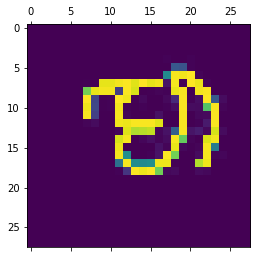

In [1933]:
nnet1 = sentive_network(episode,4)
nnet1.run_layers()


In [1849]:
nnet1.nrn_tls.get_neuron_from_id(137)#127#173#137

{'_id': 137,
 'schema_version': 1,
 'type': 'sentive_vision_packed_ratio',
 'layer_id': 3,
 'ratio_conn': 0,
 'DbConnectivity': {'pre_synaptique': [129,
   122,
   125,
   119,
   106,
   99,
   103,
   93,
   74,
   75,
   83,
   84,
   85,
   92,
   91,
   98,
   102,
   105,
   112,
   118,
   121,
   124,
   127,
   131,
   132,
   135,
   133,
   126,
   120,
   107,
   101,
   104,
   108,
   114,
   123,
   130,
   134,
   136,
   128,
   94,
   113],
  'post_synaptique': [],
  'weights': {}},
 'meta': {'path': [129,
   122,
   113,
   103,
   93,
   92,
   102,
   112,
   121,
   127,
   135,
   133,
   126,
   120,
   109],
  'tips': [129],
  'nodes': [88, 109, 109, 109, 109, 109],
  'total_length': 32.02191243148413}}

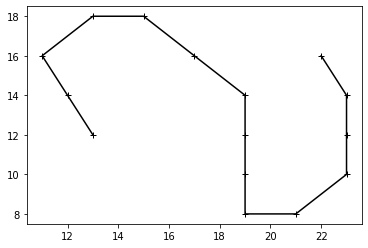

In [1850]:
nnet1.show_sequence_by_id(137)#136#173#127#137

ecart-type 0.7507297435721553
moyenne 3.2420652764866883e-09


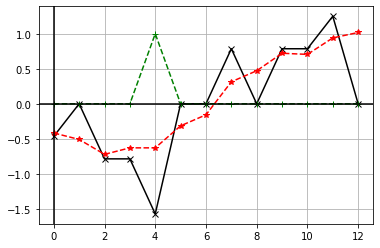

In [1934]:
int_id = 0
kernel_size = 5
kernel = np.ones(kernel_size) / kernel_size

fig, ax = plt.subplots()
ax.plot(nnet1.save_segments[int_id]["angles"],"kx-")
# ax.plot(np.diff(nnet1.save_segments[int_id]["angles"]),"g*--")
# ax.plot(np.convolve(nnet1.save_segments[int_id]["angles"], kernel),"r*--")
ax.plot(nnet1.save_segments[int_id]["l_angles"],"r*--")
ax.plot(np.abs(nnet1.save_segments[int_id]["joints"]),"g+--")
print("ecart-type",np.std(nnet1.save_segments[int_id]["angles"]))
print("moyenne",np.mean(nnet1.save_segments[int_id]["angles"]))
ax.grid(True, which='both')

ax.axhline(y=0, color='k')
ax.axvline(x=0, color='k')

# len()


In [1911]:
nnet1.save_segments[int_id]["l_angles"]

[0.30909842004948695,
 0.7853981739341604,
 0.7210480609474896,
 0.4428594955470059,
 0.22142974777350294,
 0.0,
 -0.5355890089177974,
 -0.5355890089177974,
 -0.3785093762383077,
 -0.09272952180016115,
 0.22142974355881817,
 0.4068887871591406,
 0.44285948711763634,
 0.47123889803846913,
 0.4068887871591406,
 0.3141592653589794,
 0.3141592653589794,
 0.24980915447965094,
 0.47123889803846897,
 0.5355890089177974,
 0.5355890131324823,
 0.5355890131324823,
 0.6283185349326436,
 0.563968424053315,
 0.6245228914674833,
 0.8326971815988363,
 1.0172219678978514]

{'_id': 72, 'schema_version': 2, 'type': 'sentive_vision_arcs', 'layer_id': 2, 'ratio_conn': 0.6756756756756757, 'DbConnectivity': {'pre_synaptique': [9, 6, 14], 'post_synaptique': [76, 77, 73, 80, 81], 'weights': {76: 1, 77: 2, 73: 2, 80: 1, 81: 1}}, 'meta': {'mode': 'croissance', 'center': {'x': 8, 'y': 8}, 'real_center': {'x': 0.0, 'y': 0.0}, 'matrix_width': 3, 'local_tip_1': {'x': 0, 'y': 0}, 'vector_1': {'x': 0.0, 'y': 2.0}, 'local_tip_2': {'x': 0, 'y': 0}, 'vector_2': {'x': 0, 'y': 0}, 'axes_symétrie': [], 'angle': -1.5707963267948966, 'std_angle': -1, 'length_c': 0}}


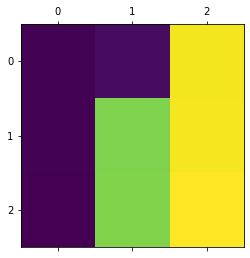

In [1648]:
nnet1.show_receptive_field_id(72)

{'_id': 72, 'schema_version': 2, 'type': 'sentive_vision_arcs', 'layer_id': 2, 'ratio_conn': 0.6756756756756757, 'DbConnectivity': {'pre_synaptique': [9, 6, 14], 'post_synaptique': [76, 77, 73, 80, 81], 'weights': {76: 1, 77: 2, 73: 2, 80: 1, 81: 1}}, 'meta': {'mode': 'croissance', 'center': {'x': 8, 'y': 8}, 'real_center': {'x': 0.0, 'y': 0.0}, 'matrix_width': 3, 'local_tip_1': {'x': 0, 'y': 0}, 'vector_1': {'x': 0.0, 'y': 2.0}, 'local_tip_2': {'x': 0, 'y': 0}, 'vector_2': {'x': 0, 'y': 0}, 'axes_symétrie': [], 'angle': -1.5707963267948966, 'std_angle': -1, 'length_c': 0}}


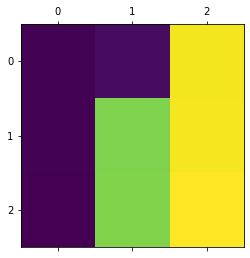

In [1647]:
nnet1.show_receptive_field_id(72)

{'_id': 155, 'schema_version': 2, 'type': 'sentive_vision_arcs', 'layer_id': 2, 'ratio_conn': 0.8333333333333334, 'DbConnectivity': {'pre_synaptique': [68, 69, 70], 'post_synaptique': [153, 154, 160, 156, 157], 'weights': {153: 1, 154: 2, 160: 1, 156: 2, 157: 1}}, 'meta': {'center': {'x': 14, 'y': 18}, 'real_center': {'x': 0.0, 'y': 0.0}, 'matrix_width': 3, 'local_tip_1': {'x': 0, 'y': 0}, 'vector_1': {'x': 2.0, 'y': 0.0}, 'local_tip_2': {'x': 0, 'y': 0}, 'vector_2': {'x': 0, 'y': 0}, 'angle': 0.0}}


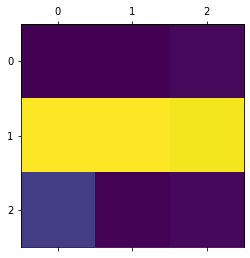

In [1734]:
nnet1.show_receptive_field_id(155)

In [1454]:
G = nnet1.nrn_tls.layer_graph[1]
nx.shortest_path(G,166,111)

[166,
 171,
 169,
 164,
 161,
 154,
 156,
 158,
 148,
 144,
 141,
 138,
 128,
 118,
 109,
 111]

5
(18,)


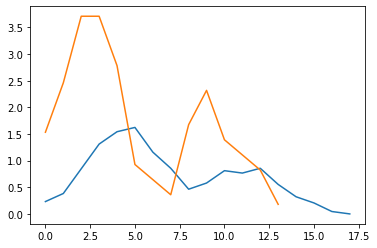

In [1778]:
kernel_size = 4
kernel = np.ones(kernel_size) / kernel_size
int_id = 1
plt.plot(np.convolve(np.abs(np.diff(nnet1.save_segments[int_id]["angles"])), kernel))
# plt.plot(np.convolve((np.diff(nnet1.save_segments[int_id]["angles"])), kernel))
# plt.plot((np.diff(nnet1.save_segments[int_id]["angles"])))
plt.plot(np.abs(np.diff(np.diff(nnet1.save_segments[int_id]["angles"]))))
print(np.argmax(np.convolve(np.abs(np.diff(nnet1.save_segments[int_id]["angles"])), kernel)))
print(np.shape(np.convolve(np.abs(np.diff(nnet1.save_segments[int_id]["angles"])), kernel)))

In [1741]:
work_segment[0:2]

array([9.27295218e-01, 2.10734243e-08])

12
16


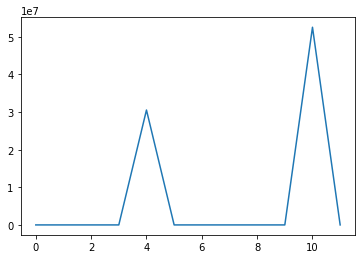

In [1767]:
ma_mb = []
int_id = 1
kernel_size = 2
work_segment = np.array(nnet1.save_segments[int_id]["angles"])

for i in range(kernel_size, len(nnet1.save_segments[int_id]["angles"])- kernel_size):
    # print(i)
    mb = np.mean(work_segment[i-kernel_size:i+1])
    ma = np.mean(work_segment[i:i+kernel_size+1])
    ma_mb.append(ma/mb)
plt.plot(ma_mb)
print(len(ma_mb))
# print(len(nnet1.save_segments[int_id]["angles"]))



In [1709]:
nnet1.save_segments[0]

{'path': [166,
  170,
  165,
  162,
  160,
  155,
  157,
  150,
  145,
  142,
  140,
  137,
  127,
  117,
  108,
  100,
  91,
  93,
  95,
  97,
  103,
  112,
  119,
  124,
  132,
  130,
  118,
  109,
  111],
 'vecteurs': [{'x': -2, 'y': 1},
  {'x': -2, 'y': -1},
  {'x': -2, 'y': -1},
  {'x': -2, 'y': -1},
  {'x': 2, 'y': -1},
  {'x': 2, 'y': 0},
  {'x': 2, 'y': -1},
  {'x': 0, 'y': -2},
  {'x': -2, 'y': -1},
  {'x': -2, 'y': 0},
  {'x': -2, 'y': -1},
  {'x': -2, 'y': -2},
  {'x': -1, 'y': -2},
  {'x': 0, 'y': -2},
  {'x': 1, 'y': -2},
  {'x': 2, 'y': -1},
  {'x': 2, 'y': 0},
  {'x': 2, 'y': 0},
  {'x': 2, 'y': 0},
  {'x': 2, 'y': 1},
  {'x': 2, 'y': 2},
  {'x': -2, 'y': 2},
  {'x': -2, 'y': 1},
  {'x': -2, 'y': 1},
  {'x': -2, 'y': 0},
  {'x': -2, 'y': -2},
  {'x': 1, 'y': -2},
  {'x': 2, 'y': 0}],
 'angles': [0.9272952180016124,
  2.1073424255447017e-08,
  2.1073424255447017e-08,
  2.214297435588181,
  0.46364760900080615,
  -0.46364760900080615,
  -1.1071487177940904,
  -1.1071487177

In [1375]:
A = {136}
print(list(A)[0])
A.pop()

136


136

In [827]:
# Affichage du nombre de connexions latérales *sortantes* par neurones
# Sélection des minimum, les tips et les maximum, les nœuds
nb_post_conn = []
for nrn_pos in nnet1.nrn_tls.lst_nrns:
    nrn = nrn_pos.neuron
    if nrn["layer_id"]==2:
        nb_post_conn.append(len(nrn["DbConnectivity"]["post_synaptique"]))
        if len(nrn["DbConnectivity"]["post_synaptique"])<=2:
            print("id_min",nrn["_id"])
        if len(nrn["DbConnectivity"]["post_synaptique"])>=9:
            print("id_max",nrn["_id"])
print(min(nb_post_conn))
print(max(nb_post_conn))
print(np.mean(nb_post_conn))
print(np.std(nb_post_conn))


id_max 78
id_max 84
id_max 88
id_max 89
id_min 95
id_max 96
id_max 97
id_min 100
id_max 108
id_max 109
id_max 114
id_max 115
id_max 120
id_min 129
2
10
6.222222222222222
2.1854093688248533


In [833]:
print(nb_post_conn)

[7, 6, 6, 7, 10, 8, 8, 6, 3, 6, 9, 7, 6, 6, 10, 10, 8, 5, 8, 8, 6, 2, 10, 10, 6, 6, 2, 7, 5, 5, 8, 4, 4, 7, 9, 10, 8, 5, 4, 4, 9, 10, 8, 5, 4, 4, 9, 5, 4, 4, 6, 3, 4, 6, 6, 2, 4, 7, 6, 4, 5, 6, 5]


In [929]:
# Affichage du nombre de connexions latérales *sortantes* par neurones
# Sélection des minimum, les tips et les maximum, les nœuds
rt_post_conn = []
for nrn_pos in nnet1.nrn_tls.lst_nrns:
    nrn = nrn_pos.neuron
    if nrn["layer_id"]==2:
        tmp_num_conn = []
        for nrn_lat in nrn["DbConnectivity"]["post_synaptique"]:
            tmp_num_conn.append(len(nnet1.nrn_tls.lst_nrns[nrn_lat-1].neuron["DbConnectivity"]["post_synaptique"]))
        new_ratio = len(nrn["DbConnectivity"]["post_synaptique"])/np.mean(tmp_num_conn)
        rt_post_conn.append(new_ratio)
        if new_ratio<=0.5:
            print("id_min",nrn["_id"])
        if new_ratio>=1.:
            print("id_MAX",nrn["_id"])
        

print("mini ratio",min(rt_post_conn))
print("MAXI ratio",max(rt_post_conn))
print(np.mean(rt_post_conn))
print(np.std(rt_post_conn))

id_min 74
id_MAX 78
id_MAX 79
id_MAX 81
id_MAX 82
id_min 83
id_MAX 84
id_MAX 85
id_MAX 86
id_MAX 93
id_MAX 94
id_MAX 99
id_MAX 101
id_MAX 103
id_MAX 104
id_MAX 105
id_MAX 106
id_MAX 107
id_MAX 111
id_MAX 112
id_MAX 113
id_MAX 119
id_MAX 121
id_MAX 123
id_MAX 125
id_MAX 126
id_MAX 128
id_MAX 131
id_MAX 132


KeyError: 'matrix_width'

In [1523]:
A={1}
if A!={}:
    print("no")
else:
    print("yes")

no


In [634]:
toto = sentive_neuron_helper()
nrn1 = nnet1.nrn_tls.get_neuron_from_id(31)
nrn2 = nnet1.nrn_tls.get_neuron_from_id(30)
toto.calc_angle(nrn1["meta"]["vector_1"],nrn2["meta"]["vector_1"])

<ipython-input-428-cffb00016d75>:380: RuntimeWarning: invalid value encountered in true_divide
  return signe * np.arccos(np.sum(np.multiply(np_c_1,np_c_2))/(np.sqrt(np.sum(np.power(np_c_1,2)))*np.sqrt(np.sum(np.power(np_c_2,2)))))


nan

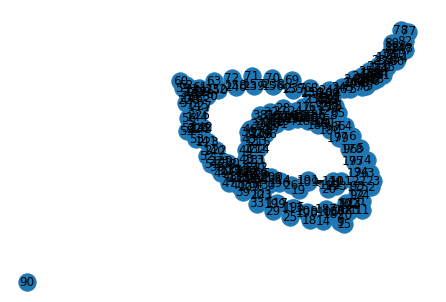

In [681]:
G = nnet1.nrn_tls.netGraph
pos = nx.spring_layout(nnet1.nrn_tls.netGraph, seed=4) 
# print(nx.rescale_layout_dict(pos))
nx.draw(G, with_labels=True, pos=pos)

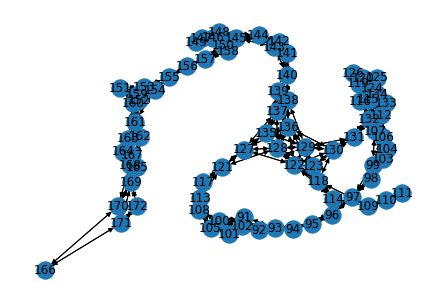

In [1437]:
G = nnet1.nrn_tls.layer_graph[1]
pos = nx.spring_layout(nnet1.nrn_tls.netGraph, seed=2) 
# pos = nx.spiral_layout(G)
# print(nx.rescale_layout_dict(pos))
nx.draw(G, with_labels=True, pos=pos)

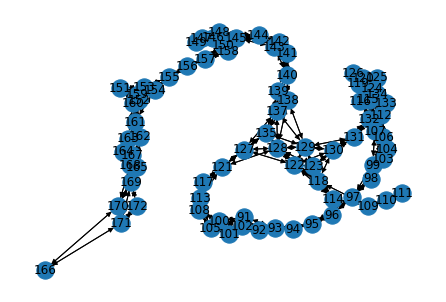

In [1438]:
G = nnet1.nrn_tls.layer_graph[1]
G.remove_node(136)
pos = nx.spring_layout(nnet1.nrn_tls.netGraph, seed=2) 
# print(nx.rescale_layout_dict(pos))
nx.draw(G, with_labels=True, pos=pos)

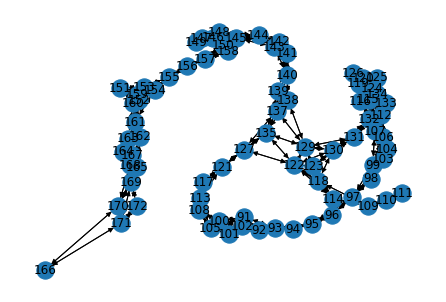

In [1439]:
G = nnet1.nrn_tls.layer_graph[1]
G.remove_node(128)
pos = nx.spring_layout(nnet1.nrn_tls.netGraph, seed=2) 
# print(nx.rescale_layout_dict(pos))
nx.draw(G, with_labels=True, pos=pos)

In [1441]:
nx.shortest_path(G, source=166, target=111) 

[166,
 171,
 169,
 164,
 161,
 154,
 156,
 158,
 148,
 144,
 141,
 138,
 129,
 118,
 109,
 111]

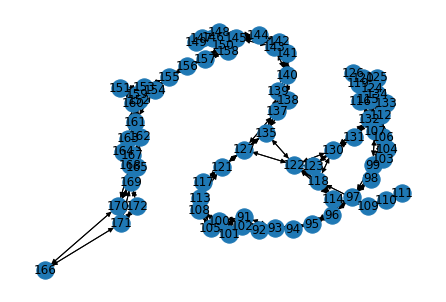

In [1442]:
G = nnet1.nrn_tls.layer_graph[1]
G.remove_node(129)
pos = nx.spring_layout(nnet1.nrn_tls.netGraph, seed=2) 
# print(nx.rescale_layout_dict(pos))
nx.draw(G, with_labels=True, pos=pos)

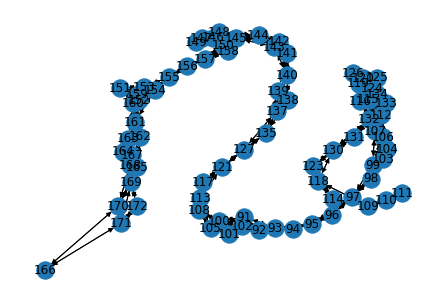

In [1443]:
G = nnet1.nrn_tls.layer_graph[1]
G.remove_node(122)
pos = nx.spring_layout(nnet1.nrn_tls.netGraph, seed=2) 
# print(nx.rescale_layout_dict(pos))
nx.draw(G, with_labels=True, pos=pos)

In [1444]:
nx.shortest_path(G, source=166, target=111) 

[166,
 170,
 165,
 162,
 160,
 155,
 157,
 150,
 145,
 142,
 140,
 137,
 127,
 117,
 108,
 100,
 91,
 93,
 95,
 97,
 103,
 112,
 119,
 124,
 132,
 130,
 118,
 109,
 111]

In [163]:
brain = sentive_brain(episode)

nombre de neurones taille 1: 22
**************************************** 

[[ 0.06351933  0.99798061]
 [-0.99798061  0.06351933]]

nombre de neurones couche 1 & 2, tailles 1 & 3: 54
****************************************

nombre Total de neurones (1, 3 & 5) 89
****************************************
nb_merge 9

nombre Total de neurones 4 couches :(1, 3, 5 & 7) 90
****************************************

nombre Total de neurones (up to layer 5) 90
****************************************
nombre de neurones taille 1: 72
**************************************** 

[[ 0.95359843 -0.30108145]
 [ 0.30108145  0.95359843]]

nombre de neurones couche 1 & 2, tailles 1 & 3: 188
****************************************

nombre Total de neurones (1, 3 & 5) 323
****************************************
nb_merge 31
supprime le neurone segment 344

nombre Total de neurones 4 couches :(1, 3, 5 & 7) 330
****************************************

nombre Total de neurones (up to layer 5) 331
************

<ipython-input-104-0542458f88ab>:357: RuntimeWarning: invalid value encountered in true_divide
  return signe * np.arccos(np.sum(np.multiply(np_c_1,np_c_2))/(np.sqrt(np.sum(np.power(np_c_1,2)))*np.sqrt(np.sum(np.power(np_c_2,2)))))



nombre Total de neurones (1, 3 & 5) 548
****************************************
nb_merge 88
supprime le neurone segment 622
supprime le neurone segment 620
supprime le neurone segment 568

nombre Total de neurones 4 couches :(1, 3, 5 & 7) 554
****************************************
550 {}

nombre Total de neurones (up to layer 5) 555
****************************************
nombre de neurones taille 1: 65
**************************************** 

[[ 0.46661446  0.88446082]
 [ 0.88446082 -0.46661446]]

nombre de neurones couche 1 & 2, tailles 1 & 3: 287
****************************************


<ipython-input-104-0542458f88ab>:357: RuntimeWarning: invalid value encountered in true_divide
  return signe * np.arccos(np.sum(np.multiply(np_c_1,np_c_2))/(np.sqrt(np.sum(np.power(np_c_1,2)))*np.sqrt(np.sum(np.power(np_c_2,2)))))



nombre Total de neurones (1, 3 & 5) 959
****************************************
nb_merge 169

nombre Total de neurones 4 couches :(1, 3, 5 & 7) 960
****************************************

nombre Total de neurones (up to layer 5) 960
****************************************
nombre de neurones taille 1: 73
**************************************** 

[[-0.96579245 -0.2593163 ]
 [-0.2593163   0.96579245]]

nombre de neurones couche 1 & 2, tailles 1 & 3: 229
****************************************


<ipython-input-104-0542458f88ab>:357: RuntimeWarning: invalid value encountered in true_divide
  return signe * np.arccos(np.sum(np.multiply(np_c_1,np_c_2))/(np.sqrt(np.sum(np.power(np_c_1,2)))*np.sqrt(np.sum(np.power(np_c_2,2)))))



nombre Total de neurones (1, 3 & 5) 523
****************************************
nb_merge 94
supprime le neurone segment 619
supprime le neurone segment 590

nombre Total de neurones 4 couches :(1, 3, 5 & 7) 528
****************************************

nombre Total de neurones (up to layer 5) 529
****************************************


In [388]:
nnet1.nrn_tls.get_neuron_from_id(74)

{'_id': 74,
 'schema_version': 2,
 'type': 'sentive_vision_arcs',
 'DbConnectivity': {'pre_synaptique': [1, 2], 'post_synaptique': [73]},
 'meta': {'mode': 'croissance',
  'center': {'x': 11, 'y': 3},
  'real_center': {'x': 0.0, 'y': 0.0},
  'matrix_width': 3,
  'local_tip_1': {'x': 0, 'y': 0},
  'vector_1': {'x': 2.0, 'y': 0.0},
  'local_tip_2': {'x': 0, 'y': 0},
  'vector_2': {'x': 0, 'y': 0},
  'axes_symétrie': [],
  'angle': 0.0,
  'std_angle': -1,
  'length_c': 0}}

In [340]:
l = nx.degree_centrality(G)

In [233]:
nnet1.show_neurons_by_layer_id(3)

74 : [0.0, 1.0, 2.0, 11.0, 12.0] {'_id': 74, 'schema_version': 2, 'type': 'sentive_vision_arcs', 'DbConnectivity': {'pre_synaptique': [0.0, 1.0, 2.0, 11.0, 12.0], 'post_synaptique': []}, 'meta': {'mode': 'croissance', 'center': {'x': 19, 'y': 6}, 'real_center': {'x': 0.0, 'y': 0.0}, 'matrix_width': 3, 'local_tip_1': {'x': 0, 'y': 0}, 'vector_1': {'x': 0, 'y': 0}, 'local_tip_2': {'x': 0, 'y': 0}, 'vector_2': {'x': 0, 'y': 0}, 'axes_symétrie': [], 'angle': -0.7853981633974483, 'std_angle': -1, 'length_c': 0}}
75 : [0.0, 1.0, 2.0, 13.0] {'_id': 75, 'schema_version': 2, 'type': 'sentive_vision_arcs', 'DbConnectivity': {'pre_synaptique': [0.0, 1.0, 2.0, 13.0], 'post_synaptique': []}, 'meta': {'mode': 'croissance', 'center': {'x': 20, 'y': 6}, 'real_center': {'x': 0.0, 'y': 0.0}, 'matrix_width': 3, 'local_tip_1': {'x': 0, 'y': 0}, 'vector_1': {'x': 0, 'y': 0}, 'local_tip_2': {'x': 0, 'y': 0}, 'vector_2': {'x': 0, 'y': 0}, 'axes_symétrie': [], 'angle': -2.356194490192345, 'std_angle': -1, 'le

7 pixels
{'_id': 670, 'schema_version': 2, 'type': 'sentive_vision_arcs', 'DbConnectivity': {'pre_synaptique': [453, 364, 400, 407, 414], 'post_synaptique': []}, 'meta': {'mode': 'croissance', 'center': {'x': 19, 'y': 10}, 'real_center': {'x': 18.9, 'y': 10.2}, 'matrix_width': 7, 'local_tip_1': {'x': 19.0, 'y': 6.0}, 'vector_1': {'x': 0.0, 'y': 1.0}, 'local_tip_2': {'x': 19.0, 'y': 14.0}, 'vector_2': {'x': -0.0, 'y': -1.0}, 'axes_symétrie': [], 'angle': 0.09272952180016122, 'std_angle': -1, 'length_c': 8.0, 'field_list': [135, 199, 175, 148, 153, 157, 94]}}


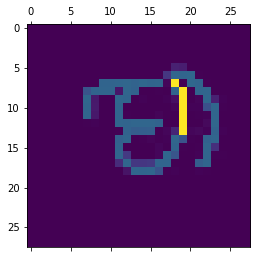

In [214]:
nnet1.show_neuron_receptive_field(670,4, True) 

In [236]:
nnet1.show_neuron_receptive_field(80,0, True) 

TypeError: 'NoneType' object is not subscriptable

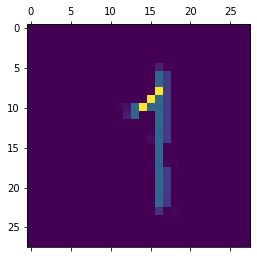

In [110]:
nnet1.show_neuron_receptive_field(59,0)

In [262]:
nnet1.nrn_tls.get_neuron_from_id(83)

{'_id': 83,
 'schema_version': 2,
 'type': 'sentive_vision_arcs',
 'DbConnectivity': {'pre_synaptique': [7, 12, 16, 17],
  'post_synaptique': [79]},
 'meta': {'mode': 'croissance',
  'center': {'x': 23, 'y': 5},
  'real_center': {'x': 0.0, 'y': 0.0},
  'matrix_width': 3,
  'local_tip_1': {'x': 0, 'y': 0},
  'vector_1': {'x': 1.5, 'y': 2.0},
  'local_tip_2': {'x': 0, 'y': 0},
  'vector_2': {'x': 0, 'y': 0},
  'axes_symétrie': [],
  'angle': 0.3926990922354363,
  'std_angle': -1,
  'length_c': 0}}

In [252]:
nnet1.nrn_tls.get_neuron_from_id(25)

{'_id': 25,
 'schema_version': 2,
 'type': 'sentive_vision_arcs',
 'DbConnectivity': {'pre_synaptique': [0.0, 2.0, 3.0, 4.0, 6.0, 8.0],
  'post_synaptique': []},
 'meta': {'mode': 'croissance',
  'center': {'x': 15, 'y': 9},
  'real_center': {'x': 0.0, 'y': 0.0},
  'matrix_width': 3,
  'local_tip_1': {'x': 0, 'y': 0},
  'vector_1': {'x': 1.5, 'y': -0.75},
  'local_tip_2': {'x': 0, 'y': 0},
  'vector_2': {'x': 0, 'y': 0},
  'axes_symétrie': [],
  'angle': 1.3744467859455345,
  'std_angle': -1,
  'length_c': 0}}

{'_id': 60, 'schema_version': 2, 'type': 'sentive_vision_arcs', 'DbConnectivity': {'pre_synaptique': [26, 34, 25], 'post_synaptique': []}, 'meta': {'mode': 'croissance', 'center': {'x': 15, 'y': 9}, 'real_center': {'x': 0.0, 'y': 0.0}, 'matrix_width': 5, 'local_tip_1': {'x': 13.0, 'y': 11.0}, 'vector_1': {'x': 2.0, 'y': -2.0}, 'local_tip_2': {'x': 16.0, 'y': 7.0}, 'vector_2': {'x': 1.0, 'y': -2.0}, 'axes_symétrie': [], 'angle': -0.3217505543966423, 'std_angle': -1, 'length_c': 0}}


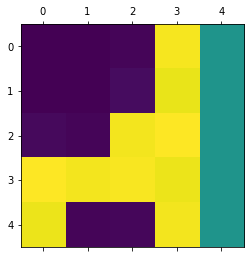

In [96]:
nnet1.show_receptive_field_id(60)

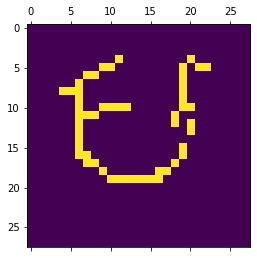

In [27]:
np_stamp = np.zeros([28,28])
## 342
vector = {
    "x": -1,
    "y": -0
}
angle =  -0.23182380450040305
start = {
    "x": 12,
    "y": 10
}
iteration = 6
toto.nrn_drwr(np_stamp,vector,angle,iteration, start)
## 351
vector = {
    "x": 1,
    "y": -1
}
angle =  -0.3425386762798121
start = {
    "x": 17,
    "y": 18
}
iteration = 6
toto.nrn_drwr(np_stamp,vector,angle,iteration, start)
## 326
vector = {
    "x": 1,
    "y": -0.5
}
angle =  1.1165750269694528
start = {
    "x": 19,
    "y": 5
}
iteration = 3
toto.nrn_drwr(np_stamp,vector,angle,iteration, start)
## 323
vector = {
    "x": 1,
    "y": -0.5
}
angle =  -0.0029197200688167533
start = {
    "x": 4,
    "y": 8
}
iteration = 7
toto.nrn_drwr(np_stamp,vector,angle,iteration, start)
## 336
vector = {
    "x": 0,
    "y": 1
}
angle =  0.08429956527287384
start = {
    "x": 19,
    "y": 5
}
iteration = 7
toto.nrn_drwr(np_stamp,vector,angle,iteration, start)
## 352
vector = {
    "x": 0,
    "y": 1
}
angle =  -0.29475261075542974
start = {
    "x": 6,
    "y": 12
}
iteration = 17
toto.nrn_drwr(np_stamp,vector,angle,iteration, start)
## 338
vector = {
    "x": 0,
    "y": -1
}
angle =  0.01892650072057606
start = {
    "x": 6,
    "y": 16
}
iteration = 8
plt.matshow(toto.nrn_drwr(np_stamp,vector,angle,iteration, start))

{'_id': 321, 'schema_version': 2, 'type': 'sentive_vision_arcs', 'DbConnectivity': {'pre_synaptique': [186, 185, 176], 'post_synaptique': []}, 'meta': {'mode': 'croissance', 'center': {'x': 16, 'y': 20}, 'real_center': {'x': 0.0, 'y': 0.0}, 'matrix_width': 5, 'local_tip_1': {'x': 14.0, 'y': 20.0}, 'vector_1': {'x': 2.0, 'y': 0.0}, 'local_tip_2': {'x': 18.0, 'y': 18.0}, 'vector_2': {'x': 2.0, 'y': -2.0}, 'axes_symétrie': [], 'angle': -0.7853981633974484, 'std_angle': -1, 'length_c': 0}}


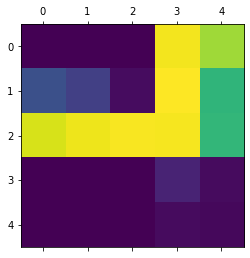

In [29]:
show_receptive_field_id(321,episd_id)

In [30]:
A = [23, 22, 29, 29, 23, 41, 41, 29, 43, 43, 41, 44, 44, 43, 45, 45, 44, 46, 46, 45, 47, 47, 46, 48, 48, 47, 49, 49, 48, 50, 50, 49, 51, 51, 50, 52, 52, 51, 53, 43, 40, 44, 42, 39, 44, 44, 42, 45, 42, 38, 44, 40, 28, 43, 38, 30, 42, 30, 23, 38, 28, 24, 40, 24, 22, 28, 23, 22, 30]
np.histogram(A,list(set(A)))

(array([3, 4, 2, 3, 3, 3, 3, 1, 3, 3, 4, 5, 7, 4, 3, 3, 3, 3, 3, 3, 3]),
 array([22, 23, 24, 28, 29, 30, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48,
        49, 50, 51, 52, 53]))

{'_id': 501, 'schema_version': 2, 'type': 'sentive_vision_arcs', 'DbConnectivity': {'pre_synaptique': [199, 175, 206], 'post_synaptique': []}, 'meta': {'mode': 'croissance', 'center': {'x': 19, 'y': 13}, 'real_center': {'x': 0.0, 'y': 0.0}, 'matrix_width': 5, 'local_tip_1': {'x': 18.0, 'y': 15.0}, 'vector_1': {'x': 1.0, 'y': -2.0}, 'local_tip_2': {'x': 19.0, 'y': 11.0}, 'vector_2': {'x': 0.0, 'y': -2.0}, 'axes_symétrie': [], 'angle': -0.46364760900080615, 'std_angle': -1, 'length_c': 0}}


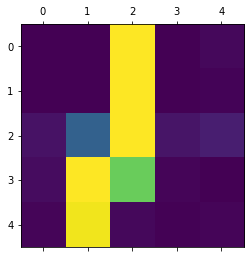

In [383]:
nnet1.show_receptive_field_id(501)

In [374]:
nnet1.nrn_tls.lst_nrns[500].neuron

{'_id': 501,
 'schema_version': 2,
 'type': 'sentive_vision_arcs',
 'DbConnectivity': {'pre_synaptique': [199, 175, 206], 'post_synaptique': []},
 'meta': {'mode': 'croissance',
  'center': {'x': 19, 'y': 13},
  'real_center': {'x': 0.0, 'y': 0.0},
  'matrix_width': 5,
  'local_tip_1': {'x': 18.0, 'y': 15.0},
  'vector_1': {'x': 1.0, 'y': -2.0},
  'local_tip_2': {'x': 19.0, 'y': 11.0},
  'vector_2': {'x': 0.0, 'y': -2.0},
  'axes_symétrie': [],
  'angle': -0.46364760900080615,
  'std_angle': -1,
  'length_c': 0}}

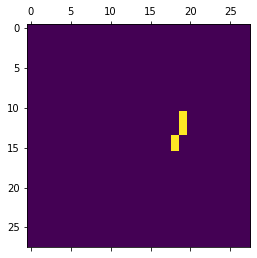

In [390]:

np_stamp = np.zeros([28,28])
vector = {
    "x": 0.5,
    "y": -1
}
angle =  -0.46364760900080615/2
start = {
    "x": 18,
    "y": 15
}
iteration = 4
plt.matshow(nnet1.nrn_tls.nrn_drwr(np_stamp,vector,angle,iteration, start))

In [15]:
nnet1.nrn_tls.lst_nrns[50].neuron["meta"]["local_tip_1"]

{'x': 1.0, 'y': 0}

In [58]:
A=set()

In [63]:
A.add(5)

In [67]:
A.pop()

4

In [68]:
A

{5}